# Preprocessing & Modeling

> In this notebook, we will be accessing the image directory of `Style` we had made in a previous notebook, `02_Data_Cleaning.ipynb`. We will set up the train and validation sets to train the model on and measure success by. Specifically, we will be using a CNN and testing various hyperparameters in efforts to create the best performing model.\n

> For full transparency and ability to recreate the results in this notebook: this code was run in `Google Colab` for access to GPUs for faster runtime and ability to use the library `tensorflow.keras` more easily.

---

## GPU Test

In [ ]:
# See what GPU we were assigned by Google Colab.  If bad, disconnect & reconnect to get new kernel/GPU assignment

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

# Reference: https://colab.research.google.com/notebooks/pro.ipynb

Thu Mar 23 20:31:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P0    47W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

import pathlib
import pickle

from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Rescaling
from tensorflow.keras.utils import image_dataset_from_directory, to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger

from google.colab import drive
drive.mount('/content/drive')

# image_directory = '/content/drive/MyDrive/Project_5/images/styles'    # Kate's
image_directory = 'drive/MyDrive/GA files/styles'       # Daniel's

Mounted at /content/drive


## Preprocessing

> `image_dataset_from_directory` is critical in our preprocessing. We tried multiple methods before finding this method. It's much easier, much faster, and is higher quality than our other attempts. (Thanks, Tim Book.) This method creates a BatchDataset from a given directory and classifies them based on their folder location. We are using a `classification` model, so the labels are categorical. The images are in color so we use `rgb`, the image size is set based on the resizing done earlier in `02_Data_Cleaning.ipynb`. A seed is set so these results can be reproduced.

In [ ]:
batch_size = 32
img_height = 250
img_width = 250
train_gen, val_gen = image_dataset_from_directory(
    image_directory,
    label_mode='categorical',
    color_mode='rgb',
    validation_split=0.2,
    subset="both",
    seed=2023,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 89637 files belonging to 51 classes.
Using 71710 files for training.
Using 17927 files for validation.


---

## Initializing Checkpoints

> Initializing this so in case of long run times, the model can be saved and fit again.

In [ ]:
model_checkpoint = ModelCheckpoint( filepath = 'drive/MyDrive/GA files/',
                                  monitor = 'val_accuracy',
                                  mode = 'max',
                                  save_best_only = True)

---

## Model #1

Base model - rmsprop, 5x filtering

In [ ]:
# model = Sequential()
# model.add(Rescaling(1/255, input_shape=(250,250,3)))
# model.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(51, activation='softmax'))

# print("Model Summary:")
# print(model.summary())
# print("--"*20)

# model.compile(
#     loss='categorical_crossentropy',
#     optimizer='rmsprop',
#     metrics=['acc']
# )

# history = model.fit(
#     train_gen,
#     validation_data= val_gen,
#     epochs=10,
#     callbacks = model_checkpoint
# )

# print("--"*20)
# print("Model Evaluation:")
# print(model.evaluate(val_gen))

In [ ]:
# #Pickle the model

# # with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
# with open(f'drive/MyDrive/GA files/base_model_1epoch.pkl', 'wb') as f:
#     pickle.dump(model, f)

---

## Model #2

adam optimizer, 5x filtering

In [ ]:
# model2 = Sequential()
# model2.add(Rescaling(1/255, input_shape=(250,250,3)))
# model2.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu"))
# model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Dropout(0.25))
# model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Dropout(0.25))
# model2.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
# model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Dropout(0.25))
# model2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Dropout(0.25))
# model2.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
# model2.add(MaxPooling2D(pool_size=(2, 2)))
# model2.add(Dropout(0.25))
# model2.add(Flatten())
# model2.add(Dense(64, activation='relu'))
# model2.add(Dropout(0.5))
# model2.add(Dense(51, activation='softmax'))

# print("Model Summary:")
# print(model2.summary())
# print("--"*20)

# model2.compile(
#     loss='categorical_crossentropy',
#     optimizer='adam',
#     metrics=['acc']
# )

# history2 = model2.fit(
#     train_gen,
#     validation_data= val_gen,
#     epochs=1,
#     callbacks = model_checkpoint
# )

# print("--"*20)
# print("Model Evaluation:")
# print(model2.evaluate(val_gen))

---

## Model #3

adam optimizer, 3x filtering

In [ ]:
# model3 = Sequential()
# model3.add(Rescaling(1/255, input_shape=(250,250,3)))
# model3.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu"))
# model3.add(MaxPooling2D(pool_size=(2, 2)))
# model3.add(Dropout(0.25))
# model3.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# model3.add(MaxPooling2D(pool_size=(2, 2)))
# model3.add(Dropout(0.25))
# model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
# model3.add(MaxPooling2D(pool_size=(2, 2)))
# model3.add(Dropout(0.25))
# model3.add(Flatten())
# model3.add(Dense(64, activation='relu'))
# model3.add(Dropout(0.5))
# model3.add(Dense(51, activation='softmax'))

# print("Model Summary:")
# print(model3.summary())
# print("--"*20)

# model3.compile(
#     loss='categorical_crossentropy',
#     optimizer='adam',
#     metrics=['acc']
# )

# history3 = model3.fit(
#     train_gen,
#     validation_data= val_gen,
#     epochs=20,
#     callbacks = model_checkpoint
# )

# print("--"*20)
# print("Model Evaluation:")
# print(model3.evaluate(val_gen))

---

## Model #4

2x2 kernel size; adam optimizer

In [ ]:
# model4 = Sequential()
# model4.add(Rescaling(1/255, input_shape=(250,250,3)))
# model4.add(Conv2D(filters=16, kernel_size=(2, 2), activation="relu"))
# model4.add(MaxPooling2D(pool_size=(2, 2)))
# model4.add(Dropout(0.25))
# model4.add(Conv2D(filters=32, kernel_size=(2, 2), activation='relu'))
# model4.add(MaxPooling2D(pool_size=(2, 2)))
# model4.add(Dropout(0.25))
# model4.add(Conv2D(filters=64, kernel_size=(2, 2), activation="relu"))
# model4.add(MaxPooling2D(pool_size=(2, 2)))
# model4.add(Dropout(0.25))
# model4.add(Flatten())
# model4.add(Dense(64, activation='relu'))
# model4.add(Dropout(0.5))
# model4.add(Dense(51, activation='softmax'))

# print("Model Summary:")
# print(model4.summary())
# print("--"*20)

# model4.compile(
#     loss='categorical_crossentropy',
#     optimizer='adam',
#     metrics=['acc']
# )

# history4 = model4.fit(
#     train_gen,
#     validation_data= val_gen,
#     epochs=20,
#     callbacks = model_checkpoint
# )

# print("--"*20)
# print("Model Evaluation:")
# print(model4.evaluate(val_gen))

---

## Model #5

added regularization, adam optimizer

In [ ]:
# model5 = Sequential()
# model5.add(Rescaling(1/255, input_shape=(250,250,3)))
# model5.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu"))
# model5.add(MaxPooling2D(pool_size=(2, 2)))
# model5.add(Dropout(0.25))
# model5.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2'))
# model5.add(MaxPooling2D(pool_size=(2, 2)))
# model5.add(Dropout(0.25))
# model5.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", kernel_regularizer='l2'))
# model5.add(MaxPooling2D(pool_size=(2, 2)))
# model5.add(Dropout(0.25))
# model5.add(Flatten())
# model5.add(Dense(64, activation='relu', kernel_regularizer='l2'))
# model5.add(Dropout(0.5))
# model5.add(Dense(51, activation='softmax'))

# print("Model Summary:")
# print(model5.summary())
# print("--"*20)

# model5.compile(
#     loss='categorical_crossentropy',
#     optimizer='adam',
#     metrics=['acc']
# )

# history5 = model5.fit(
#     train_gen,
#     validation_data= val_gen,
#     epochs=20,
#     callbacks = model_checkpoint
# )

# print("--"*20)
# print("Model Evaluation:")
# print(model5.evaluate(val_gen))

---

## Model #5rms

added regularization, rms optimizer

In [ ]:
# my_optimizer = 'rmsprop' # 'adam' or 'rmsprop'
# mods_summary = '5rms_rgz' # a string that says what params changed (used for naming the model pickle later)
# epoch_counter = 0

# filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
# history_logger = CSVLogger(filename, separator=",", append=True)

# model5rms = Sequential()
# model5rms.add(Rescaling(1/255, input_shape=(250,250,3)))
# model5rms.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", kernel_regularizer='l2'))
# model5rms.add(MaxPooling2D(pool_size=(2, 2)))
# model5rms.add(Dropout(0.25))
# model5rms.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2'))
# model5rms.add(MaxPooling2D(pool_size=(2, 2)))
# model5rms.add(Dropout(0.25))
# model5rms.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", kernel_regularizer='l2'))
# model5rms.add(MaxPooling2D(pool_size=(2, 2)))
# model5rms.add(Dropout(0.25))
# model5rms.add(Flatten())
# model5rms.add(Dense(64, activation='relu', kernel_regularizer='l2'))
# model5rms.add(Dropout(0.5))
# model5rms.add(Dense(51, activation='softmax'))

# print("Model Summary:")
# print(model5rms.summary())
# print("--"*20)

# model5rms.compile(
#     loss='categorical_crossentropy',
#     optimizer=my_optimizer,
#     metrics=['acc']
# )



In [ ]:
# # Re-run from here down for more epochs

# num_epochs = 1  # number of epochs to run on this pass

# history5rms = model5rms.fit(
#     train_gen,
#     validation_data= val_gen,
#     epochs=num_epochs,
#     callbacks = [model_checkpoint, history_logger]
# )

# epoch_counter += num_epochs

# print("--"*20)
# print("Model Evaluation:")
# print(model5rms.evaluate(val_gen))

In [ ]:
# #Pickle the model

# with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
#     pickle.dump(model5rms, f)

---

## Model #6rms

higher dropout (.5, .5, .75) - rmsprop, 2x filtering

In [ ]:
# my_optimizer = 'rmsprop' # 'adam' or 'rmsprop'
# mods_summary = '6rms_hi_dropout' # a string that says what params changed (used for naming the model pickle later)
# epoch_counter = 0

# filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
# history_logger = CSVLogger(filename, separator=",", append=True)

# model6rms = Sequential()
# model6rms.add(Rescaling(1/255, input_shape=(250,250,3)))
# model6rms.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu"))
# model6rms.add(MaxPooling2D(pool_size=(2, 2)))
# model6rms.add(Dropout(0.5))
# model6rms.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# model6rms.add(MaxPooling2D(pool_size=(2, 2)))
# model6rms.add(Dropout(0.5))
# model6rms.add(Flatten())
# model6rms.add(Dense(64, activation='relu'))
# model6rms.add(Dropout(0.75))
# model6rms.add(Dense(51, activation='softmax'))

# print("Model Summary:")
# print(model6rms.summary())
# print("--"*20)

# model6rms.compile(
#     loss='categorical_crossentropy',
#     optimizer=my_optimizer,
#     metrics=['acc']
# )



In [ ]:
# # Re-run from here down for more epochs

# num_epochs = 10  # number of epochs to run on this pass

# history6rms = model6rms.fit(
#     train_gen,
#     validation_data= val_gen,
#     epochs=num_epochs,
#     callbacks = [model_checkpoint, history_logger]
# )

# epoch_counter += num_epochs

# print("--"*20)
# print("Model Evaluation:")
# print(model6rms.evaluate(val_gen))

In [ ]:
# plt.figure(figsize=(12,6))
# plt.title(f"{my_optimizer}_{mods_summary}_model losses")
# plt.plot(history6rms.history['loss'], c='navy', label="Training Loss")
# plt.plot(history6rms.history['val_loss'], c='skyblue', label="Validation Loss")
# plt.legend();

In [ ]:
# #Pickle the model

# with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
#     pickle.dump(model6rms, f)

---

## Model #7rms

batch normlization, higher dropout (.5, .5, .75) - rmsprop, 2x filtering

In [ ]:
# my_optimizer = 'rmsprop' # 'adam' or 'rmsprop'
# mods_summary = '7rms_batchnorm' # a string that says what params changed (used for naming the model pickle later)
# epoch_counter = 0

# filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
# history_logger = CSVLogger(filename, separator=",", append=True)

# model7rms = Sequential()
# model7rms.add(Rescaling(1/255, input_shape=(250,250,3)))
# model7rms.add(BatchNormalization())
# model7rms.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu"))
# model7rms.add(MaxPooling2D(pool_size=(2, 2)))
# model7rms.add(Dropout(0.5))
# model7rms.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
# model7rms.add(MaxPooling2D(pool_size=(2, 2)))
# model7rms.add(Dropout(0.5))
# model7rms.add(Flatten())
# model7rms.add(Dense(64, activation='relu'))
# model7rms.add(Dropout(0.75))
# model7rms.add(Dense(51, activation='softmax'))

# print("Model Summary:")
# print(model7rms.summary())
# print("--"*20)

# model7rms.compile(
#     loss='categorical_crossentropy',
#     optimizer=my_optimizer,
#     metrics=['acc']
# )



In [ ]:
# # Re-run from here down for more epochs

# num_epochs = 10  # number of epochs to run on this pass

# history7rms = model7rms.fit(
#     train_gen,
#     validation_data= val_gen,
#     epochs=num_epochs,
#     callbacks = [model_checkpoint, history_logger]
# )

# epoch_counter += num_epochs

# print("--"*20)
# print("Model Evaluation:")
# print(model7rms.evaluate(val_gen))

In [ ]:
# plt.figure(figsize=(12,6))
# plt.title(f"{my_optimizer}_{mods_summary}_model losses")
# plt.plot(history7rms.history['loss'], c='navy', label="Training Loss")
# plt.plot(history7rms.history['val_loss'], c='skyblue', label="Validation Loss")
# plt.legend();

In [ ]:
# #Pickle the model

# with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
#     pickle.dump(model7rms, f)

---

## Model #8rms

base (rmsprop) - batch normalization, regularization , dropout, 5x filtering

In [ ]:
# my_optimizer = 'rmsprop' # 'adam' or 'rmsprop'
# mods_summary = '8rms_bn_rgz_drp' # a string that says what params changed (used for naming the model pickle later)
# epoch_counter = 0

# filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
# history_logger = CSVLogger(filename, separator=",", append=True)

# model8rms = Sequential()
# model8rms.add(Rescaling(1/255, input_shape=(250,250,3)))
# model8rms.add(BatchNormalization())
# model8rms.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", kernel_regularizer='l2'))
# model8rms.add(MaxPooling2D(pool_size=(2, 2)))
# model8rms.add(Dropout(0.25))
# model8rms.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2'))
# model8rms.add(MaxPooling2D(pool_size=(2, 2)))
# model8rms.add(Dropout(0.25))
# model8rms.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", kernel_regularizer='l2'))
# model8rms.add(MaxPooling2D(pool_size=(2, 2)))
# model8rms.add(Dropout(0.25))
# model8rms.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2'))
# model8rms.add(MaxPooling2D(pool_size=(2, 2)))
# model8rms.add(Dropout(0.25))
# model8rms.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2'))
# model8rms.add(MaxPooling2D(pool_size=(2, 2)))
# model8rms.add(Dropout(0.25))
# model8rms.add(Flatten())
# model8rms.add(Dense(64, activation='relu'))
# model8rms.add(Dropout(0.5))
# model8rms.add(Dense(51, activation='softmax'))

# print("Model Summary:")
# print(model8rms.summary())
# print("--"*20)

# model8rms.compile(
#     loss='categorical_crossentropy',
#     optimizer=my_optimizer,
#     metrics=['acc']
# )



In [ ]:
# # Re-run from here down for more epochs

# num_epochs = 10  # number of epochs to run on this pass

# history8rms = model8rms.fit(
#     train_gen,
#     validation_data= val_gen,
#     epochs=num_epochs,
#     callbacks = [model_checkpoint, history_logger]
# )

# epoch_counter += num_epochs

# print("--"*20)
# print("Model Evaluation:")
# print(model8rms.evaluate(val_gen))

In [ ]:
# plt.figure(figsize=(12,6))
# plt.title(f"{my_optimizer}_{mods_summary}_model losses")
# plt.plot(history8rms.history['loss'], c='navy', label="Training Loss")
# plt.plot(history8rms.history['val_loss'], c='skyblue', label="Validation Loss")
# plt.legend();

In [ ]:
# #Pickle the model

# with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
#     pickle.dump(model8rms, f)

---

## Model #9rms

(rmsprop) - batch normalization, regularization , MED dropout (.5, .5, .5, .5, .5, .75), 5x filtering

In [ ]:
my_optimizer = 'rmsprop' # 'adam' or 'rmsprop'
mods_summary = '9rms_bn_rgz_MEDdrp' # a string that says what params changed (used for naming the model pickle later)
epoch_counter = 0

filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
history_logger = CSVLogger(filename, separator=",", append=True)

model9rms = Sequential()
model9rms.add(Rescaling(1/255, input_shape=(250,250,3)))
model9rms.add(BatchNormalization())
model9rms.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu", kernel_regularizer='l2'))
model9rms.add(MaxPooling2D(pool_size=(2, 2)))
model9rms.add(Dropout(0.5))
model9rms.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2'))
model9rms.add(MaxPooling2D(pool_size=(2, 2)))
model9rms.add(Dropout(0.5))
model9rms.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", kernel_regularizer='l2'))
model9rms.add(MaxPooling2D(pool_size=(2, 2)))
model9rms.add(Dropout(0.5))
model9rms.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2'))
model9rms.add(MaxPooling2D(pool_size=(2, 2)))
model9rms.add(Dropout(0.5))
model9rms.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_regularizer='l2'))
model9rms.add(MaxPooling2D(pool_size=(2, 2)))
model9rms.add(Dropout(0.5))
model9rms.add(Flatten())
model9rms.add(Dense(64, activation='relu'))
model9rms.add(Dropout(0.75))
model9rms.add(Dense(51, activation='softmax'))

print("Model Summary:")
print(model9rms.summary())
print("--"*20)

model9rms.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['acc']
)



Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 250, 250, 3)       0         
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 124, 124, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 

In [ ]:
# Re-run from here down for more epochs

num_epochs = 10  # number of epochs to run on this pass

history9rms = model9rms.fit(
    train_gen,
    validation_data= val_gen,
    epochs=num_epochs,
    callbacks = [model_checkpoint, history_logger]
)

epoch_counter += num_epochs

print("--"*20)
print("Model Evaluation:")
print(model9rms.evaluate(val_gen))

Epoch 1/10
2241/2241 [==============================] - ETA: 0s - loss: 3.8887 - acc: 0.0382

2241/2241 [==============================] - 1591s 702ms/step - loss: 3.8887 - acc: 0.0382 - val_loss: 3.7447 - val_acc: 0.0391
Epoch 2/10
2241/2241 [==============================] - ETA: 0s - loss: 3.7549 - acc: 0.0389

2241/2241 [==============================] - 61s 27ms/step - loss: 3.7549 - acc: 0.0389 - val_loss: 3.7411 - val_acc: 0.0391
Epoch 3/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.7515 - acc: 0.0376

2241/2241 [==============================] - 61s 27ms/step - loss: 3.7515 - acc: 0.0376 - val_loss: 3.7405 - val_acc: 0.0379
Epoch 4/10
2239/2241 [============================>.] - ETA: 0s - loss: 3.7506 - acc: 0.0372

2241/2241 [==============================] - 61s 27ms/step - loss: 3.7505 - acc: 0.0372 - val_loss: 3.7402 - val_acc: 0.0379
Epoch 5/10
2241/2241 [==============================] - ETA: 0s - loss: 3.7505 - acc: 0.0379

2241/2241 [==============================] - 61s 27ms/step - loss: 3.7505 - acc: 0.0379 - val_loss: 3.7401 - val_acc: 0.0379
Epoch 6/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.7508 - acc: 0.0374

2241/2241 [==============================] - 61s 27ms/step - loss: 3.7508 - acc: 0.0374 - val_loss: 3.7402 - val_acc: 0.0379
Epoch 7/10
2239/2241 [============================>.] - ETA: 0s - loss: 3.7509 - acc: 0.0378

2241/2241 [==============================] - 61s 27ms/step - loss: 3.7509 - acc: 0.0378 - val_loss: 3.7402 - val_acc: 0.0391
Epoch 8/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.7509 - acc: 0.0380

2241/2241 [==============================] - 61s 27ms/step - loss: 3.7509 - acc: 0.0380 - val_loss: 3.7402 - val_acc: 0.0379
Epoch 9/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.7510 - acc: 0.0375

2241/2241 [==============================] - 61s 27ms/step - loss: 3.7509 - acc: 0.0375 - val_loss: 3.7402 - val_acc: 0.0379
Epoch 10/10
2241/2241 [==============================] - ETA: 0s - loss: 3.7509 - acc: 0.0378

2241/2241 [==============================] - 61s 27ms/step - loss: 3.7509 - acc: 0.0378 - val_loss: 3.7402 - val_acc: 0.0379
----------------------------------------
Model Evaluation:
561/561 [==============================] - 9s 15ms/step - loss: 3.7402 - acc: 0.0379
[3.740248680114746, 0.03793160989880562]


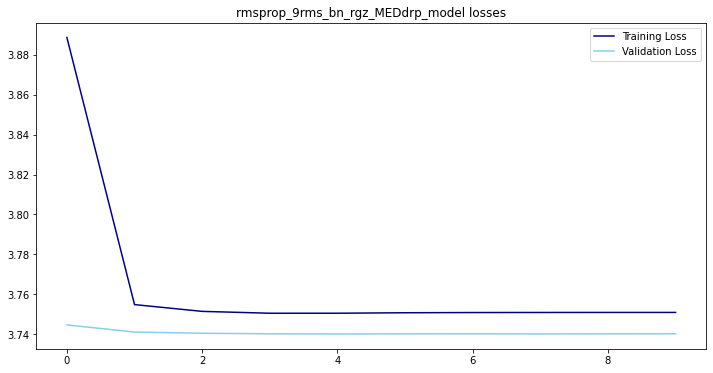

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"{my_optimizer}_{mods_summary}_model losses")
plt.plot(history9rms.history['loss'], c='navy', label="Training Loss")
plt.plot(history9rms.history['val_loss'], c='skyblue', label="Validation Loss")
plt.legend();

In [ ]:
#Pickle the model

with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
    pickle.dump(model9rms, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......dropout_4
.........vars
......dropout_5
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......max_pooling2d_3
.........vars
......max_pooling2d_4
.........vars
......rescaling
.........vars
...metrics
......mean

In [ ]:
#alternate model save method
save_model(model9rms, 'drive/MyDrive/GA files/model9rms.hdf5')     # tf.keras.models.save_model

---

## Model #10a

(adam) - batch normalization, MED dropout (.5, .5, .5, .5, .5, .75), 5x filtering

In [ ]:
my_optimizer = 'adam' # 'adam' or 'rmsprop'
mods_summary = '10a_bn_MEDdrp' # a string that says what params changed (used for naming the model pickle later)
epoch_counter = 0

filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
history_logger = CSVLogger(filename, separator=",", append=True)

model10a = Sequential()
model10a.add(Rescaling(1/255, input_shape=(250,250,3)))
model10a.add(BatchNormalization(input_shape=(250,250,3)))
model10a.add(Conv2D(filters=16, kernel_size=(3, 3), activation="relu"))
model10a.add(MaxPooling2D(pool_size=(2, 2)))
model10a.add(Dropout(0.5))
model10a.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model10a.add(MaxPooling2D(pool_size=(2, 2)))
model10a.add(Dropout(0.5))
model10a.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model10a.add(MaxPooling2D(pool_size=(2, 2)))
model10a.add(Dropout(0.5))
model10a.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model10a.add(MaxPooling2D(pool_size=(2, 2)))
model10a.add(Dropout(0.5))
model10a.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model10a.add(MaxPooling2D(pool_size=(2, 2)))
model10a.add(Dropout(0.5))
model10a.add(Flatten())
model10a.add(Dense(64, activation='relu'))
model10a.add(Dropout(0.75))
model10a.add(Dense(51, activation='softmax'))

print("Model Summary:")
print(model10a.summary())
print("--"*20)

model10a.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['acc']
)



Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 250, 250, 3)       0         
                                                                 
 batch_normalization_1 (Batc  (None, 250, 250, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 124, 124, 16)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 124, 124, 16)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 122

In [ ]:
# Re-run from here down for more epochs

num_epochs = 10  # number of epochs to run on this pass

history10a = model10a.fit(
    train_gen,
    validation_data= val_gen,
    epochs=num_epochs,
    callbacks = [model_checkpoint, history_logger]
)

epoch_counter += num_epochs

print("--"*20)
print("Model Evaluation:")
print(model10a.evaluate(val_gen))

Epoch 1/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.8067 - acc: 0.0376

2241/2241 [==============================] - 65s 27ms/step - loss: 3.8067 - acc: 0.0376 - val_loss: 3.7503 - val_acc: 0.0379
Epoch 2/10
2241/2241 [==============================] - ETA: 0s - loss: 3.7528 - acc: 0.0372

2241/2241 [==============================] - 61s 27ms/step - loss: 3.7528 - acc: 0.0372 - val_loss: 3.7417 - val_acc: 0.0379
Epoch 3/10
2239/2241 [============================>.] - ETA: 0s - loss: 3.7506 - acc: 0.0374

2241/2241 [==============================] - 62s 27ms/step - loss: 3.7505 - acc: 0.0374 - val_loss: 3.7407 - val_acc: 0.0379
Epoch 4/10
2241/2241 [==============================] - ETA: 0s - loss: 3.7504 - acc: 0.0373

2241/2241 [==============================] - 62s 28ms/step - loss: 3.7504 - acc: 0.0373 - val_loss: 3.7405 - val_acc: 0.0379
Epoch 5/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.7504 - acc: 0.0377

2241/2241 [==============================] - 63s 28ms/step - loss: 3.7504 - acc: 0.0377 - val_loss: 3.7405 - val_acc: 0.0391
Epoch 6/10
2241/2241 [==============================] - ETA: 0s - loss: 3.7513 - acc: 0.0373

2241/2241 [==============================] - 62s 28ms/step - loss: 3.7513 - acc: 0.0373 - val_loss: 3.7405 - val_acc: 0.0391
Epoch 7/10
2241/2241 [==============================] - ETA: 0s - loss: 3.7504 - acc: 0.0379

2241/2241 [==============================] - 61s 27ms/step - loss: 3.7504 - acc: 0.0379 - val_loss: 3.7404 - val_acc: 0.0391
Epoch 8/10
2239/2241 [============================>.] - ETA: 0s - loss: 3.7504 - acc: 0.0377

2241/2241 [==============================] - 62s 27ms/step - loss: 3.7504 - acc: 0.0377 - val_loss: 3.7404 - val_acc: 0.0379
Epoch 9/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.7503 - acc: 0.0375

2241/2241 [==============================] - 61s 27ms/step - loss: 3.7504 - acc: 0.0375 - val_loss: 3.7404 - val_acc: 0.0391
Epoch 10/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.7536 - acc: 0.0377

2241/2241 [==============================] - 61s 27ms/step - loss: 3.7536 - acc: 0.0377 - val_loss: 3.7404 - val_acc: 0.0391
----------------------------------------
Model Evaluation:
561/561 [==============================] - 9s 16ms/step - loss: 3.7404 - acc: 0.0391
[3.7404394149780273, 0.03910302743315697]


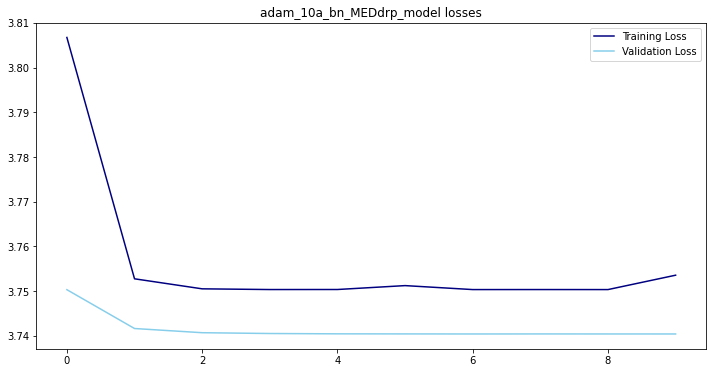

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"{my_optimizer}_{mods_summary}_model losses")
plt.plot(history10a.history['loss'], c='navy', label="Training Loss")
plt.plot(history10a.history['val_loss'], c='skyblue', label="Validation Loss")
plt.legend();

In [ ]:
#Pickle the model

with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
    pickle.dump(model10a, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......dropout_4
.........vars
......dropout_5
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......max_pooling2d_3
.........vars
......max_pooling2d_4
.........vars
......rescaling
.........vars
...metrics
......mean

In [ ]:
#alternate model save method
save_model(model10a, 'drive/MyDrive/GA files/model10a.hdf5')     # tf.keras.models.save_model

---

## Model #11a

(adam) - 5x5kernels, batch normalization, MED dropout (.5, .5, .5, .5, .5, .75), 5x filtering

In [ ]:
my_optimizer = 'adam' # 'adam' or 'rmsprop'
mods_summary = '11a_5x5_bn_MEDdrp' # a string that says what params changed (used for naming the model pickle later)
epoch_counter = 0

filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
history_logger = CSVLogger(filename, separator=",", append=True)

model11a = Sequential()
model11a.add(Rescaling(1/255, input_shape=(250,250,3)))
model11a.add(BatchNormalization())
model11a.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu"))
model11a.add(MaxPooling2D(pool_size=(2, 2)))
model11a.add(Dropout(0.5))
model11a.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model11a.add(MaxPooling2D(pool_size=(2, 2)))
model11a.add(Dropout(0.5))
model11a.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model11a.add(MaxPooling2D(pool_size=(2, 2)))
model11a.add(Dropout(0.5))
model11a.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model11a.add(MaxPooling2D(pool_size=(2, 2)))
model11a.add(Dropout(0.5))
model11a.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model11a.add(MaxPooling2D(pool_size=(2, 2)))
model11a.add(Dropout(0.5))
model11a.add(Flatten())
model11a.add(Dense(64, activation='relu'))
model11a.add(Dropout(0.75))
model11a.add(Dense(51, activation='softmax'))

print("Model Summary:")
print(model11a.summary())
print("--"*20)

model11a.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['acc']
)



Model Summary:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 250, 250, 3)       0         
                                                                 
 batch_normalization_2 (Batc  (None, 250, 250, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 246, 246, 16)      1216      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 123, 123, 16)     0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 123, 123, 16)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 119

In [ ]:
# Re-run from here down for more epochs

num_epochs = 5  # number of epochs to run on this pass

history11a = model11a.fit(
    train_gen,
    validation_data= val_gen,
    epochs=num_epochs,
    callbacks = [model_checkpoint, history_logger]
)

epoch_counter += num_epochs

print("--"*20)
print("Model Evaluation:")
print(model11a.evaluate(val_gen))

Epoch 1/5
2241/2241 [==============================] - ETA: 0s - loss: 3.7650 - acc: 0.0443

2241/2241 [==============================] - 71s 30ms/step - loss: 3.7650 - acc: 0.0443 - val_loss: 3.6562 - val_acc: 0.0559
Epoch 2/5
2239/2241 [============================>.] - ETA: 0s - loss: 3.6320 - acc: 0.0606

2241/2241 [==============================] - 67s 30ms/step - loss: 3.6321 - acc: 0.0606 - val_loss: 3.6260 - val_acc: 0.0607
Epoch 3/5
2240/2241 [============================>.] - ETA: 0s - loss: 3.5885 - acc: 0.0641

2241/2241 [==============================] - 67s 30ms/step - loss: 3.5885 - acc: 0.0641 - val_loss: 3.6422 - val_acc: 0.0588
Epoch 4/5
2240/2241 [============================>.] - ETA: 0s - loss: 3.5578 - acc: 0.0690

2241/2241 [==============================] - 67s 30ms/step - loss: 3.5578 - acc: 0.0689 - val_loss: 3.6199 - val_acc: 0.0593
Epoch 5/5
2240/2241 [============================>.] - ETA: 0s - loss: 3.5386 - acc: 0.0718

2241/2241 [==============================] - 68s 30ms/step - loss: 3.5386 - acc: 0.0718 - val_loss: 3.6328 - val_acc: 0.0607
----------------------------------------
Model Evaluation:
561/561 [==============================] - 9s 16ms/step - loss: 3.6328 - acc: 0.0607
[3.632763624191284, 0.06074636057019234]


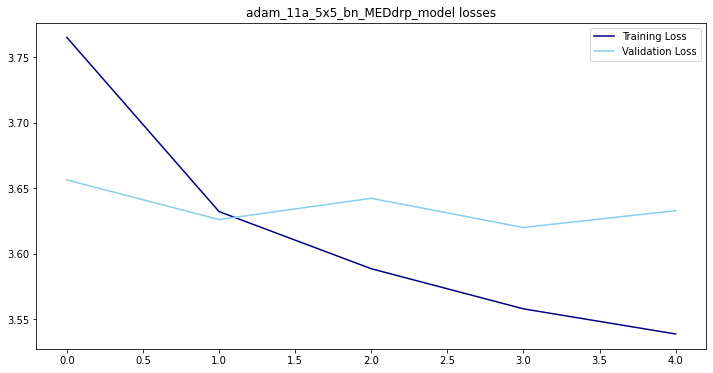

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"{my_optimizer}_{mods_summary}_model losses")
plt.plot(history11a.history['loss'], c='navy', label="Training Loss")
plt.plot(history11a.history['val_loss'], c='skyblue', label="Validation Loss")
plt.legend();

In [ ]:
#Pickle the model

with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
    pickle.dump(model11a, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......dropout_4
.........vars
......dropout_5
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......max_pooling2d_3
.........vars
......max_pooling2d_4
.........vars
......rescaling
.........vars
...metrics
......mean

In [ ]:
#alternate model save method
save_model(model11a, 'drive/MyDrive/GA files/model11a.hdf5')     # tf.keras.models.save_model

---

## Model #12a

(adam) - 5x5kernels, batch normalization,LOW dropout (.1, .1), 2x filtering

In [ ]:
my_optimizer = 'adam' # 'adam' or 'rmsprop'
mods_summary = '12a_2layer_5x5_bn_LOWdrp' # a string that says what params changed (used for naming the model pickle later)
epoch_counter = 0

filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
history_logger = CSVLogger(filename, separator=",", append=True)

model12a = Sequential()
model12a.add(Rescaling(1/255, input_shape=(250,250,3)))
model12a.add(BatchNormalization())
model12a.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu"))
model12a.add(MaxPooling2D(pool_size=(2, 2)))
model12a.add(Dropout(0.1))
model12a.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model12a.add(MaxPooling2D(pool_size=(2, 2)))
model12a.add(Dropout(0.1))
model12a.add(Flatten())
model12a.add(Dense(64, activation='relu'))
model12a.add(Dropout(0.75))
model12a.add(Dense(51, activation='softmax'))

print("Model Summary:")
print(model12a.summary())
print("--"*20)

model12a.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['acc']
)



Model Summary:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 250, 250, 3)       0         
                                                                 
 batch_normalization_3 (Batc  (None, 250, 250, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_15 (Conv2D)          (None, 246, 246, 16)      1216      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 123, 123, 16)     0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 123, 123, 16)      0         
                                                                 
 conv2d_16 (Conv2D)          (None, 119

In [ ]:
# Re-run from here down for more epochs

num_epochs = 20  # number of epochs to run on this pass

history12a = model12a.fit(
    train_gen,
    validation_data= val_gen,
    epochs=num_epochs,
    callbacks = [model_checkpoint, history_logger]
)

epoch_counter += num_epochs

print("--"*20)
print("Model Evaluation:")
print(model12a.evaluate(val_gen))

Epoch 1/20
2239/2241 [============================>.] - ETA: 0s - loss: 3.1127 - acc: 0.1421

2241/2241 [==============================] - 60s 27ms/step - loss: 3.1127 - acc: 0.1421 - val_loss: 3.2486 - val_acc: 0.1357
Epoch 2/20
2241/2241 [==============================] - ETA: 0s - loss: 3.0967 - acc: 0.1463

2241/2241 [==============================] - 60s 26ms/step - loss: 3.0967 - acc: 0.1463 - val_loss: 3.2856 - val_acc: 0.1344
Epoch 3/20
2241/2241 [==============================] - ETA: 0s - loss: 3.0820 - acc: 0.1502

2241/2241 [==============================] - 60s 27ms/step - loss: 3.0820 - acc: 0.1502 - val_loss: 3.3021 - val_acc: 0.1307
Epoch 4/20
2241/2241 [==============================] - ETA: 0s - loss: 3.0744 - acc: 0.1506

2241/2241 [==============================] - 60s 27ms/step - loss: 3.0744 - acc: 0.1506 - val_loss: 3.2773 - val_acc: 0.1311
Epoch 5/20
2240/2241 [============================>.] - ETA: 0s - loss: 3.0533 - acc: 0.1534

2241/2241 [==============================] - 60s 27ms/step - loss: 3.0533 - acc: 0.1534 - val_loss: 3.2707 - val_acc: 0.1386
Epoch 6/20
2241/2241 [==============================] - ETA: 0s - loss: 3.0388 - acc: 0.1567

2241/2241 [==============================] - 60s 27ms/step - loss: 3.0388 - acc: 0.1567 - val_loss: 3.3010 - val_acc: 0.1383
Epoch 7/20
2239/2241 [============================>.] - ETA: 0s - loss: 3.0285 - acc: 0.1584

2241/2241 [==============================] - 60s 27ms/step - loss: 3.0286 - acc: 0.1583 - val_loss: 3.2646 - val_acc: 0.1355
Epoch 8/20
2241/2241 [==============================] - ETA: 0s - loss: 3.0228 - acc: 0.1583

2241/2241 [==============================] - 60s 27ms/step - loss: 3.0228 - acc: 0.1583 - val_loss: 3.2964 - val_acc: 0.1343
Epoch 9/20
2241/2241 [==============================] - ETA: 0s - loss: 3.0075 - acc: 0.1633

2241/2241 [==============================] - 60s 27ms/step - loss: 3.0075 - acc: 0.1633 - val_loss: 3.3069 - val_acc: 0.1377
Epoch 10/20
2239/2241 [============================>.] - ETA: 0s - loss: 3.0055 - acc: 0.1634

2241/2241 [==============================] - 60s 27ms/step - loss: 3.0053 - acc: 0.1635 - val_loss: 3.2854 - val_acc: 0.1344
Epoch 11/20
2241/2241 [==============================] - ETA: 0s - loss: 2.9891 - acc: 0.1671

2241/2241 [==============================] - 60s 27ms/step - loss: 2.9891 - acc: 0.1671 - val_loss: 3.2842 - val_acc: 0.1375
Epoch 12/20
2239/2241 [============================>.] - ETA: 0s - loss: 2.9812 - acc: 0.1683

2241/2241 [==============================] - 60s 27ms/step - loss: 2.9811 - acc: 0.1683 - val_loss: 3.3125 - val_acc: 0.1368
Epoch 13/20
2239/2241 [============================>.] - ETA: 0s - loss: 2.9757 - acc: 0.1691

2241/2241 [==============================] - 60s 27ms/step - loss: 2.9757 - acc: 0.1691 - val_loss: 3.3237 - val_acc: 0.1323
Epoch 14/20
2240/2241 [============================>.] - ETA: 0s - loss: 2.9736 - acc: 0.1696

2241/2241 [==============================] - 60s 27ms/step - loss: 2.9735 - acc: 0.1696 - val_loss: 3.3120 - val_acc: 0.1316
Epoch 15/20
2241/2241 [==============================] - ETA: 0s - loss: 2.9583 - acc: 0.1712

2241/2241 [==============================] - 60s 27ms/step - loss: 2.9583 - acc: 0.1712 - val_loss: 3.3101 - val_acc: 0.1353
Epoch 16/20
2240/2241 [============================>.] - ETA: 0s - loss: 2.9571 - acc: 0.1737

2241/2241 [==============================] - 60s 27ms/step - loss: 2.9569 - acc: 0.1738 - val_loss: 3.3123 - val_acc: 0.1325
Epoch 17/20
2239/2241 [============================>.] - ETA: 0s - loss: 2.9450 - acc: 0.1743

2241/2241 [==============================] - 60s 27ms/step - loss: 2.9449 - acc: 0.1743 - val_loss: 3.3146 - val_acc: 0.1322
Epoch 18/20
2240/2241 [============================>.] - ETA: 0s - loss: 2.9367 - acc: 0.1770

2241/2241 [==============================] - 60s 27ms/step - loss: 2.9367 - acc: 0.1769 - val_loss: 3.3321 - val_acc: 0.1339
Epoch 19/20
2240/2241 [============================>.] - ETA: 0s - loss: 2.9295 - acc: 0.1780

2241/2241 [==============================] - 60s 27ms/step - loss: 2.9295 - acc: 0.1780 - val_loss: 3.3478 - val_acc: 0.1320
Epoch 20/20
2240/2241 [============================>.] - ETA: 0s - loss: 2.9244 - acc: 0.1769

2241/2241 [==============================] - 60s 27ms/step - loss: 2.9244 - acc: 0.1769 - val_loss: 3.3587 - val_acc: 0.1369
----------------------------------------
Model Evaluation:
561/561 [==============================] - 9s 16ms/step - loss: 3.3587 - acc: 0.1369
[3.358736276626587, 0.13694427907466888]


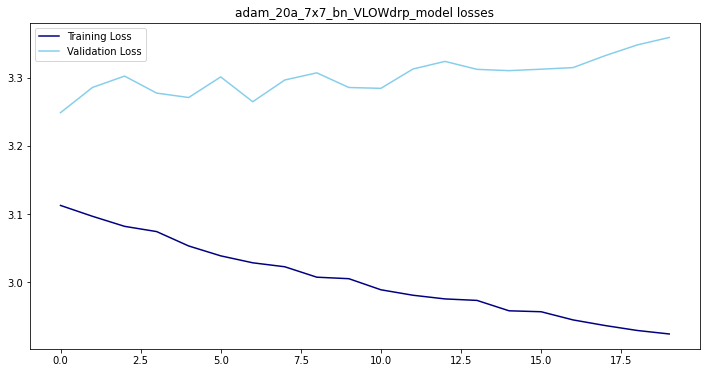

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"{my_optimizer}_{mods_summary}_model losses")
plt.plot(history12a.history['loss'], c='navy', label="Training Loss")
plt.plot(history12a.history['val_loss'], c='skyblue', label="Validation Loss")
plt.legend();

In [ ]:
#Pickle the model

with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
    pickle.dump(model12a, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......rescaling
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
...

In [ ]:
#alternate model save method
save_model(model12a, 'drive/MyDrive/GA files/model12a.hdf5')     # tf.keras.models.save_model

---

## Model #13a

(adam) - 5x5kernels, MED dropout (.5, .5, .5, .5, .5, .75), 5x filtering, NO batch normalization

In [ ]:
my_optimizer = 'adam' # 'adam' or 'rmsprop'
mods_summary = '13a_5x5_MEDdrp' # a string that says what params changed (used for naming the model pickle later)
epoch_counter = 0

filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
history_logger = CSVLogger(filename, separator=",", append=True)

model13a = Sequential()
model13a.add(Rescaling(1/255, input_shape=(250,250,3)))
model13a.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu"))
model13a.add(MaxPooling2D(pool_size=(2, 2)))
model13a.add(Dropout(0.5))
model13a.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model13a.add(MaxPooling2D(pool_size=(2, 2)))
model13a.add(Dropout(0.5))
model13a.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model13a.add(MaxPooling2D(pool_size=(2, 2)))
model13a.add(Dropout(0.5))
model13a.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model13a.add(MaxPooling2D(pool_size=(2, 2)))
model13a.add(Dropout(0.5))
model13a.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
model13a.add(MaxPooling2D(pool_size=(2, 2)))
model13a.add(Dropout(0.5))
model13a.add(Flatten())
model13a.add(Dense(64, activation='relu'))
model13a.add(Dropout(0.75))
model13a.add(Dense(51, activation='softmax'))

print("Model Summary:")
print(model13a.summary())
print("--"*20)

model13a.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['acc']
)



Model Summary:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 250, 250, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 246, 246, 16)      1216      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 123, 123, 16)     0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 123, 123, 16)      0         
                                                                 
 conv2d_18 (Conv2D)          (None, 119, 119, 32)      12832     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 59, 59, 32)       0         
 g2D)                                  

In [ ]:
# Re-run from here down for more epochs

num_epochs = 10  # number of epochs to run on this pass

history13a = model13a.fit(
    train_gen,
    validation_data= val_gen,
    epochs=num_epochs,
    callbacks = [model_checkpoint, history_logger]
)

epoch_counter += num_epochs

print("--"*20)
print("Model Evaluation:")
print(model13a.evaluate(val_gen))

Epoch 1/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.7685 - acc: 0.0422

2241/2241 [==============================] - 56s 24ms/step - loss: 3.7685 - acc: 0.0423 - val_loss: 3.7843 - val_acc: 0.0401
Epoch 2/10
2241/2241 [==============================] - ETA: 0s - loss: 3.6460 - acc: 0.0586

2241/2241 [==============================] - 52s 23ms/step - loss: 3.6460 - acc: 0.0586 - val_loss: 3.6765 - val_acc: 0.0580
Epoch 3/10
2239/2241 [============================>.] - ETA: 0s - loss: 3.5952 - acc: 0.0668

2241/2241 [==============================] - 52s 23ms/step - loss: 3.5951 - acc: 0.0668 - val_loss: 3.6251 - val_acc: 0.0666
Epoch 4/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.5709 - acc: 0.0677

2241/2241 [==============================] - 52s 23ms/step - loss: 3.5709 - acc: 0.0677 - val_loss: 3.6671 - val_acc: 0.0552
Epoch 5/10
2241/2241 [==============================] - ETA: 0s - loss: 3.5575 - acc: 0.0700

2241/2241 [==============================] - 53s 24ms/step - loss: 3.5575 - acc: 0.0700 - val_loss: 3.6403 - val_acc: 0.0560
Epoch 6/10
2239/2241 [============================>.] - ETA: 0s - loss: 3.5437 - acc: 0.0724

2241/2241 [==============================] - 53s 23ms/step - loss: 3.5437 - acc: 0.0724 - val_loss: 3.7322 - val_acc: 0.0456
Epoch 7/10
2239/2241 [============================>.] - ETA: 0s - loss: 3.5394 - acc: 0.0725

2241/2241 [==============================] - 53s 24ms/step - loss: 3.5393 - acc: 0.0725 - val_loss: 3.6495 - val_acc: 0.0587
Epoch 8/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.5297 - acc: 0.0728

2241/2241 [==============================] - 53s 24ms/step - loss: 3.5297 - acc: 0.0728 - val_loss: 3.7309 - val_acc: 0.0464
Epoch 9/10
2241/2241 [==============================] - ETA: 0s - loss: 3.5298 - acc: 0.0737

2241/2241 [==============================] - 53s 24ms/step - loss: 3.5298 - acc: 0.0737 - val_loss: 3.6186 - val_acc: 0.0600
Epoch 10/10
2241/2241 [==============================] - ETA: 0s - loss: 3.5204 - acc: 0.0747

2241/2241 [==============================] - 53s 24ms/step - loss: 3.5204 - acc: 0.0747 - val_loss: 3.9160 - val_acc: 0.0288
----------------------------------------
Model Evaluation:
561/561 [==============================] - 10s 17ms/step - loss: 3.9160 - acc: 0.0288
[3.915989637374878, 0.02883918024599552]


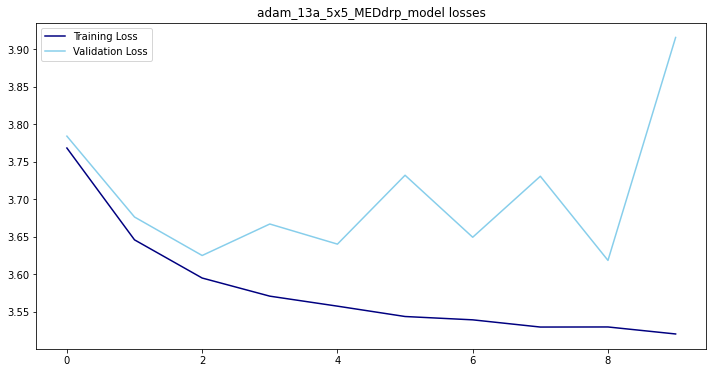

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"{my_optimizer}_{mods_summary}_model losses")
plt.plot(history13a.history['loss'], c='navy', label="Training Loss")
plt.plot(history13a.history['val_loss'], c='skyblue', label="Validation Loss")
plt.legend();

In [ ]:
#Pickle the model

with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
    pickle.dump(model13a, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......dropout_4
.........vars
......dropout_5
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......max_pooling2d_3
.........vars
......max_pooling2d_4
.........vars
......rescaling
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0

In [ ]:
#alternate model save method
save_model(model10a, 'drive/MyDrive/GA files/model13a.hdf5')     # tf.keras.models.save_model

---

## Model #14a

(adam) - 7x7kernels, MED dropout (.5, .5, .5, .5, .5, .75), 5x filtering, NO batch normalization

In [ ]:
my_optimizer = 'adam' # 'adam' or 'rmsprop'
mods_summary = '14a_7x7_MEDdrp' # a string that says what params changed (used for naming the model pickle later)
epoch_counter = 0

filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
history_logger = CSVLogger(filename, separator=",", append=True)

model14a = Sequential()
model14a.add(Rescaling(1/255, input_shape=(250,250,3)))
model14a.add(Conv2D(filters=16, kernel_size=(7, 7), activation="relu"))
model14a.add(MaxPooling2D(pool_size=(2, 2)))
model14a.add(Dropout(0.5))
model14a.add(Conv2D(filters=32, kernel_size=(7, 7), activation='relu'))
model14a.add(MaxPooling2D(pool_size=(2, 2)))
model14a.add(Dropout(0.5))
model14a.add(Conv2D(filters=64, kernel_size=(7, 7), activation="relu"))
model14a.add(MaxPooling2D(pool_size=(2, 2)))
model14a.add(Dropout(0.5))
model14a.add(Conv2D(filters=128, kernel_size=(7, 7), activation='relu'))
model14a.add(MaxPooling2D(pool_size=(2, 2)))
model14a.add(Dropout(0.5))
model14a.add(Conv2D(filters=256, kernel_size=(7, 7), activation='relu'))
model14a.add(MaxPooling2D(pool_size=(2, 2)))
model14a.add(Dropout(0.5))
model14a.add(Flatten())
model14a.add(Dense(64, activation='relu'))
model14a.add(Dropout(0.75))
model14a.add(Dense(51, activation='softmax'))

print("Model Summary:")
print(model14a.summary())
print("--"*20)

model14a.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['acc']
)



Model Summary:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 250, 250, 3)       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 244, 244, 16)      2368      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 122, 122, 16)     0         
 g2D)                                                            
                                                                 
 dropout_27 (Dropout)        (None, 122, 122, 16)      0         
                                                                 
 conv2d_23 (Conv2D)          (None, 116, 116, 32)      25120     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 58, 58, 32)       0         
 g2D)                                  

In [ ]:
# Re-run from here down for more epochs

num_epochs = 10  # number of epochs to run on this pass

history14a = model14a.fit(
    train_gen,
    validation_data= val_gen,
    epochs=num_epochs,
    callbacks = [model_checkpoint, history_logger]
)

epoch_counter += num_epochs

print("--"*20)
print("Model Evaluation:")
print(model14a.evaluate(val_gen))

Epoch 1/10
2241/2241 [==============================] - ETA: 0s - loss: 3.7886 - acc: 0.0387

2241/2241 [==============================] - 58s 24ms/step - loss: 3.7886 - acc: 0.0387 - val_loss: 3.7483 - val_acc: 0.0379
Epoch 2/10
2241/2241 [==============================] - ETA: 0s - loss: 3.7580 - acc: 0.0388

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7580 - acc: 0.0388 - val_loss: 3.7424 - val_acc: 0.0391
Epoch 3/10
2239/2241 [============================>.] - ETA: 0s - loss: 3.7536 - acc: 0.0391

2241/2241 [==============================] - 55s 25ms/step - loss: 3.7535 - acc: 0.0391 - val_loss: 3.7406 - val_acc: 0.0380
Epoch 4/10
2241/2241 [==============================] - ETA: 0s - loss: 3.7399 - acc: 0.0412

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7399 - acc: 0.0412 - val_loss: 3.7319 - val_acc: 0.0402
Epoch 5/10
2241/2241 [==============================] - ETA: 0s - loss: 3.6900 - acc: 0.0518

2241/2241 [==============================] - 54s 24ms/step - loss: 3.6900 - acc: 0.0518 - val_loss: 3.7905 - val_acc: 0.0380
Epoch 6/10
2239/2241 [============================>.] - ETA: 0s - loss: 3.6627 - acc: 0.0593

2241/2241 [==============================] - 54s 24ms/step - loss: 3.6626 - acc: 0.0593 - val_loss: 3.8019 - val_acc: 0.0394
Epoch 7/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.6537 - acc: 0.0583

2241/2241 [==============================] - 54s 24ms/step - loss: 3.6537 - acc: 0.0583 - val_loss: 3.8820 - val_acc: 0.0388
Epoch 8/10
2241/2241 [==============================] - ETA: 0s - loss: 3.6469 - acc: 0.0606

2241/2241 [==============================] - 54s 24ms/step - loss: 3.6469 - acc: 0.0606 - val_loss: 3.8631 - val_acc: 0.0392
Epoch 9/10
2239/2241 [============================>.] - ETA: 0s - loss: 3.6449 - acc: 0.0595

2241/2241 [==============================] - 55s 24ms/step - loss: 3.6449 - acc: 0.0595 - val_loss: 3.8905 - val_acc: 0.0395
Epoch 10/10
2241/2241 [==============================] - ETA: 0s - loss: 3.6357 - acc: 0.0605

2241/2241 [==============================] - 54s 24ms/step - loss: 3.6357 - acc: 0.0605 - val_loss: 3.8651 - val_acc: 0.0456
----------------------------------------
Model Evaluation:
561/561 [==============================] - 9s 15ms/step - loss: 3.8651 - acc: 0.0456
[3.8651113510131836, 0.04562949761748314]


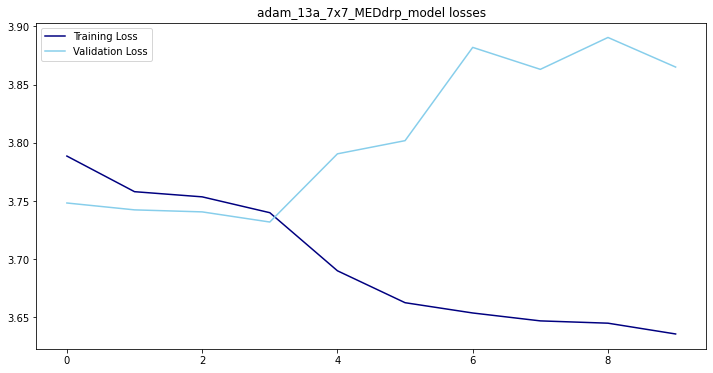

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"{my_optimizer}_{mods_summary}_model losses")
plt.plot(history14a.history['loss'], c='navy', label="Training Loss")
plt.plot(history14a.history['val_loss'], c='skyblue', label="Validation Loss")
plt.legend();

In [ ]:
#Pickle the model

with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
    pickle.dump(model14a, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......dropout_4
.........vars
......dropout_5
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......max_pooling2d_3
.........vars
......max_pooling2d_4
.........vars
......rescaling
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0

In [ ]:
#alternate model save method
save_model(model14a, 'drive/MyDrive/GA files/model14a.hdf5')     # tf.keras.models.save_model

---

## Model #15a

(adam) - 7x7kernels, LOW dropout (.1, .1, .1, .1, .1, .2), 5x filtering, NO batch normalization

In [ ]:
my_optimizer = 'adam' # 'adam' or 'rmsprop'
mods_summary = '15a_7x7_LOWdrp' # a string that says what params changed (used for naming the model pickle later)
epoch_counter = 0

filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
history_logger = CSVLogger(filename, separator=",", append=True)

model15a = Sequential()
model15a.add(Rescaling(1/255, input_shape=(250,250,3)))
model15a.add(Conv2D(filters=16, kernel_size=(7, 7), activation="relu"))
model15a.add(MaxPooling2D(pool_size=(2, 2)))
model15a.add(Dropout(0.1))
model15a.add(Conv2D(filters=32, kernel_size=(7, 7), activation='relu'))
model15a.add(MaxPooling2D(pool_size=(2, 2)))
model15a.add(Dropout(0.1))
model15a.add(Conv2D(filters=64, kernel_size=(7, 7), activation="relu"))
model15a.add(MaxPooling2D(pool_size=(2, 2)))
model15a.add(Dropout(0.1))
model15a.add(Conv2D(filters=128, kernel_size=(7, 7), activation='relu'))
model15a.add(MaxPooling2D(pool_size=(2, 2)))
model15a.add(Dropout(0.1))
model15a.add(Conv2D(filters=256, kernel_size=(7, 7), activation='relu'))
model15a.add(MaxPooling2D(pool_size=(2, 2)))
model15a.add(Dropout(0.1))
model15a.add(Flatten())
model15a.add(Dense(64, activation='relu'))
model15a.add(Dropout(0.2))
model15a.add(Dense(51, activation='softmax'))

print("Model Summary:")
print(model15a.summary())
print("--"*20)

model15a.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['acc']
)



Model Summary:
Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_44 (Rescaling)    (None, 250, 250, 3)       0         
                                                                 
 conv2d_236 (Conv2D)         (None, 244, 244, 16)      2368      
                                                                 
 max_pooling2d_206 (MaxPooli  (None, 122, 122, 16)     0         
 ng2D)                                                           
                                                                 
 dropout_220 (Dropout)       (None, 122, 122, 16)      0         
                                                                 
 conv2d_237 (Conv2D)         (None, 116, 116, 32)      25120     
                                                                 
 max_pooling2d_207 (MaxPooli  (None, 58, 58, 32)       0         
 ng2D)                                

In [ ]:
# Re-run from here down for more epochs

num_epochs = 20  # number of epochs to run on this pass

history15a = model15a.fit(
    train_gen,
    validation_data= val_gen,
    epochs=num_epochs,
    callbacks = [model_checkpoint, history_logger]
)

epoch_counter += num_epochs

print("--"*20)
print("Model Evaluation:")
print(model15a.evaluate(val_gen))

Epoch 1/20
2241/2241 [==============================] - ETA: 0s - loss: 3.7711 - acc: 0.0374

2241/2241 [==============================] - 56s 24ms/step - loss: 3.7711 - acc: 0.0374 - val_loss: 3.7420 - val_acc: 0.0379
Epoch 2/20
2241/2241 [==============================] - ETA: 0s - loss: 3.7566 - acc: 0.0369

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7566 - acc: 0.0369 - val_loss: 3.7433 - val_acc: 0.0379
Epoch 3/20
2239/2241 [============================>.] - ETA: 0s - loss: 3.7548 - acc: 0.0384

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7548 - acc: 0.0384 - val_loss: 3.7439 - val_acc: 0.0391
Epoch 4/20
2241/2241 [==============================] - ETA: 0s - loss: 3.7537 - acc: 0.0380

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7537 - acc: 0.0380 - val_loss: 3.7426 - val_acc: 0.0379
Epoch 5/20
2240/2241 [============================>.] - ETA: 0s - loss: 3.7531 - acc: 0.0382

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7531 - acc: 0.0381 - val_loss: 3.7428 - val_acc: 0.0379
Epoch 6/20
2239/2241 [============================>.] - ETA: 0s - loss: 3.7528 - acc: 0.0384

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7528 - acc: 0.0384 - val_loss: 3.7418 - val_acc: 0.0391
Epoch 7/20
2240/2241 [============================>.] - ETA: 0s - loss: 3.7524 - acc: 0.0383

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7523 - acc: 0.0383 - val_loss: 3.7417 - val_acc: 0.0379
Epoch 8/20
2239/2241 [============================>.] - ETA: 0s - loss: 3.7522 - acc: 0.0391

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7521 - acc: 0.0391 - val_loss: 3.7412 - val_acc: 0.0379
Epoch 9/20
2240/2241 [============================>.] - ETA: 0s - loss: 3.7519 - acc: 0.0377

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7520 - acc: 0.0377 - val_loss: 3.7411 - val_acc: 0.0379
Epoch 10/20
2240/2241 [============================>.] - ETA: 0s - loss: 3.7517 - acc: 0.0384

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7517 - acc: 0.0384 - val_loss: 3.7412 - val_acc: 0.0379
Epoch 11/20
2240/2241 [============================>.] - ETA: 0s - loss: 3.7519 - acc: 0.0380

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7518 - acc: 0.0380 - val_loss: 3.7411 - val_acc: 0.0379
Epoch 12/20
2240/2241 [============================>.] - ETA: 0s - loss: 3.7517 - acc: 0.0372

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7516 - acc: 0.0372 - val_loss: 3.7409 - val_acc: 0.0391
Epoch 13/20
2241/2241 [==============================] - ETA: 0s - loss: 3.7517 - acc: 0.0379

2241/2241 [==============================] - 55s 25ms/step - loss: 3.7517 - acc: 0.0379 - val_loss: 3.7410 - val_acc: 0.0379
Epoch 14/20
2239/2241 [============================>.] - ETA: 0s - loss: 3.7515 - acc: 0.0379

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7514 - acc: 0.0379 - val_loss: 3.7410 - val_acc: 0.0379
Epoch 15/20
2240/2241 [============================>.] - ETA: 0s - loss: 3.7514 - acc: 0.0377

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7514 - acc: 0.0377 - val_loss: 3.7408 - val_acc: 0.0379
Epoch 16/20
2240/2241 [============================>.] - ETA: 0s - loss: 3.7513 - acc: 0.0376

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7513 - acc: 0.0376 - val_loss: 3.7409 - val_acc: 0.0391
Epoch 17/20
2240/2241 [============================>.] - ETA: 0s - loss: 3.7511 - acc: 0.0383

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7511 - acc: 0.0383 - val_loss: 3.7409 - val_acc: 0.0379
Epoch 18/20
2240/2241 [============================>.] - ETA: 0s - loss: 3.7510 - acc: 0.0378

2241/2241 [==============================] - 55s 24ms/step - loss: 3.7510 - acc: 0.0378 - val_loss: 3.7408 - val_acc: 0.0379
Epoch 19/20
2241/2241 [==============================] - ETA: 0s - loss: 3.7510 - acc: 0.0378

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7510 - acc: 0.0378 - val_loss: 3.7408 - val_acc: 0.0379
Epoch 20/20
2240/2241 [============================>.] - ETA: 0s - loss: 3.7509 - acc: 0.0372

2241/2241 [==============================] - 54s 24ms/step - loss: 3.7509 - acc: 0.0372 - val_loss: 3.7408 - val_acc: 0.0379
----------------------------------------
Model Evaluation:
561/561 [==============================] - 9s 16ms/step - loss: 3.7408 - acc: 0.0379
[3.740837812423706, 0.03793160989880562]


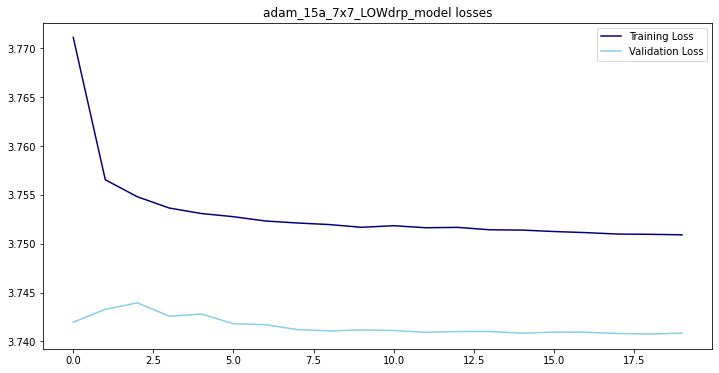

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"{my_optimizer}_{mods_summary}_model losses")
plt.plot(history15a.history['loss'], c='navy', label="Training Loss")
plt.plot(history15a.history['val_loss'], c='skyblue', label="Validation Loss")
plt.legend();

In [ ]:
#Pickle the model

with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
    pickle.dump(model15a, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......dropout_4
.........vars
......dropout_5
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......max_pooling2d_3
.........vars
......max_pooling2d_4
.........vars
......rescaling
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0

In [ ]:
#alternate model save method
save_model(model15a, 'drive/MyDrive/GA files/model15a.hdf5')     # tf.keras.models.save_model

---

## Model #16a

(adam) - 7x7kernels, WITH batch normalization, LOW dropout (.1, .1, .1, .1, .1, .2), 5x filtering

In [ ]:
my_optimizer = 'adam' # 'adam' or 'rmsprop'
mods_summary = '16a_7x7_bn_LOWdrp' # a string that says what params changed (used for naming the model pickle later)
epoch_counter = 0

filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
history_logger = CSVLogger(filename, separator=",", append=True)

model16a = Sequential()
model16a.add(Rescaling(1/255, input_shape=(250,250,3)))
model16a.add(BatchNormalization())
model16a.add(Conv2D(filters=16, kernel_size=(7, 7), activation="relu"))
model16a.add(MaxPooling2D(pool_size=(2, 2)))
model16a.add(Dropout(0.1))
model16a.add(Conv2D(filters=32, kernel_size=(7, 7), activation='relu'))
model16a.add(MaxPooling2D(pool_size=(2, 2)))
model16a.add(Dropout(0.1))
model16a.add(Conv2D(filters=64, kernel_size=(7, 7), activation="relu"))
model16a.add(MaxPooling2D(pool_size=(2, 2)))
model16a.add(Dropout(0.1))
model16a.add(Conv2D(filters=128, kernel_size=(7, 7), activation='relu'))
model16a.add(MaxPooling2D(pool_size=(2, 2)))
model16a.add(Dropout(0.1))
model16a.add(Conv2D(filters=256, kernel_size=(7, 7), activation='relu'))
model16a.add(MaxPooling2D(pool_size=(2, 2)))
model16a.add(Dropout(0.1))
model16a.add(Flatten())
model16a.add(Dense(64, activation='relu'))
model16a.add(Dropout(0.2))
model16a.add(Dense(51, activation='softmax'))

print("Model Summary:")
print(model16a.summary())
print("--"*20)

model16a.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['acc']
)



Model Summary:
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_45 (Rescaling)    (None, 250, 250, 3)       0         
                                                                 
 batch_normalization_41 (Bat  (None, 250, 250, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_241 (Conv2D)         (None, 244, 244, 16)      2368      
                                                                 
 max_pooling2d_211 (MaxPooli  (None, 122, 122, 16)     0         
 ng2D)                                                           
                                                                 
 dropout_226 (Dropout)       (None, 122, 122, 16)      0         
                                                                 
 conv2d_242 (Conv2D)         (None, 11

In [ ]:
# Re-run from here down for more epochs

num_epochs = 20  # number of epochs to run on this pass

history16a = model16a.fit(
    train_gen,
    validation_data= val_gen,
    epochs=num_epochs,
    callbacks = [model_checkpoint, history_logger]
)

epoch_counter += num_epochs

print("--"*20)
print("Model Evaluation:")
print(model16a.evaluate(val_gen))

Epoch 1/20
2241/2241 [==============================] - ETA: 0s - loss: 3.6899 - acc: 0.0522

2241/2241 [==============================] - 73s 31ms/step - loss: 3.6899 - acc: 0.0522 - val_loss: 3.5430 - val_acc: 0.0752
Epoch 2/20
2241/2241 [==============================] - ETA: 0s - loss: 3.5287 - acc: 0.0772

2241/2241 [==============================] - 70s 31ms/step - loss: 3.5287 - acc: 0.0772 - val_loss: 3.4263 - val_acc: 0.0962
Epoch 3/20
2241/2241 [==============================] - ETA: 0s - loss: 3.3906 - acc: 0.0976

2241/2241 [==============================] - 70s 31ms/step - loss: 3.3906 - acc: 0.0976 - val_loss: 3.2763 - val_acc: 0.1151
Epoch 4/20
2241/2241 [==============================] - ETA: 0s - loss: 3.3137 - acc: 0.1145

2241/2241 [==============================] - 70s 31ms/step - loss: 3.3137 - acc: 0.1145 - val_loss: 3.2521 - val_acc: 0.1254
Epoch 5/20
2241/2241 [==============================] - ETA: 0s - loss: 3.2673 - acc: 0.1216

2241/2241 [==============================] - 70s 31ms/step - loss: 3.2673 - acc: 0.1216 - val_loss: 3.2134 - val_acc: 0.1344
Epoch 6/20
2241/2241 [==============================] - ETA: 0s - loss: 3.2305 - acc: 0.1311

2241/2241 [==============================] - 70s 31ms/step - loss: 3.2305 - acc: 0.1311 - val_loss: 3.1661 - val_acc: 0.1402
Epoch 7/20
2241/2241 [==============================] - ETA: 0s - loss: 3.1983 - acc: 0.1360

2241/2241 [==============================] - 70s 31ms/step - loss: 3.1983 - acc: 0.1360 - val_loss: 3.1365 - val_acc: 0.1469
Epoch 8/20
2241/2241 [==============================] - ETA: 0s - loss: 3.1668 - acc: 0.1432

2241/2241 [==============================] - 70s 31ms/step - loss: 3.1668 - acc: 0.1432 - val_loss: 3.1329 - val_acc: 0.1501
Epoch 9/20
2241/2241 [==============================] - ETA: 0s - loss: 3.1473 - acc: 0.1492

2241/2241 [==============================] - 70s 31ms/step - loss: 3.1473 - acc: 0.1492 - val_loss: 3.1001 - val_acc: 0.1545
Epoch 10/20
2241/2241 [==============================] - ETA: 0s - loss: 3.1215 - acc: 0.1538

2241/2241 [==============================] - 70s 31ms/step - loss: 3.1215 - acc: 0.1538 - val_loss: 3.0841 - val_acc: 0.1613
Epoch 11/20
2241/2241 [==============================] - ETA: 0s - loss: 3.0934 - acc: 0.1600

2241/2241 [==============================] - 70s 31ms/step - loss: 3.0934 - acc: 0.1600 - val_loss: 3.0868 - val_acc: 0.1652
Epoch 12/20
2241/2241 [==============================] - ETA: 0s - loss: 3.0685 - acc: 0.1649

2241/2241 [==============================] - 70s 31ms/step - loss: 3.0685 - acc: 0.1649 - val_loss: 3.0824 - val_acc: 0.1611
Epoch 13/20
2241/2241 [==============================] - ETA: 0s - loss: 3.0549 - acc: 0.1687

2241/2241 [==============================] - 70s 31ms/step - loss: 3.0549 - acc: 0.1687 - val_loss: 3.0805 - val_acc: 0.1678
Epoch 14/20
2241/2241 [==============================] - ETA: 0s - loss: 3.0275 - acc: 0.1741

2241/2241 [==============================] - 70s 31ms/step - loss: 3.0275 - acc: 0.1741 - val_loss: 3.0819 - val_acc: 0.1653
Epoch 15/20
2241/2241 [==============================] - ETA: 0s - loss: 3.0100 - acc: 0.1782

2241/2241 [==============================] - 70s 31ms/step - loss: 3.0100 - acc: 0.1782 - val_loss: 3.0552 - val_acc: 0.1748
Epoch 16/20
2241/2241 [==============================] - ETA: 0s - loss: 2.9923 - acc: 0.1807

2241/2241 [==============================] - 70s 31ms/step - loss: 2.9923 - acc: 0.1807 - val_loss: 3.0471 - val_acc: 0.1737
Epoch 17/20
2241/2241 [==============================] - ETA: 0s - loss: 2.9688 - acc: 0.1856

2241/2241 [==============================] - 70s 31ms/step - loss: 2.9688 - acc: 0.1856 - val_loss: 3.0659 - val_acc: 0.1696
Epoch 18/20
2241/2241 [==============================] - ETA: 0s - loss: 2.9507 - acc: 0.1901

2241/2241 [==============================] - 70s 31ms/step - loss: 2.9507 - acc: 0.1901 - val_loss: 3.0528 - val_acc: 0.1743
Epoch 19/20
2241/2241 [==============================] - ETA: 0s - loss: 2.9278 - acc: 0.1954

2241/2241 [==============================] - 70s 31ms/step - loss: 2.9278 - acc: 0.1954 - val_loss: 3.0662 - val_acc: 0.1733
Epoch 20/20
2241/2241 [==============================] - ETA: 0s - loss: 2.9073 - acc: 0.1992

2241/2241 [==============================] - 70s 31ms/step - loss: 2.9073 - acc: 0.1992 - val_loss: 3.0741 - val_acc: 0.1742
----------------------------------------
Model Evaluation:
561/561 [==============================] - 9s 16ms/step - loss: 3.0741 - acc: 0.1742
[3.0740926265716553, 0.17420651018619537]


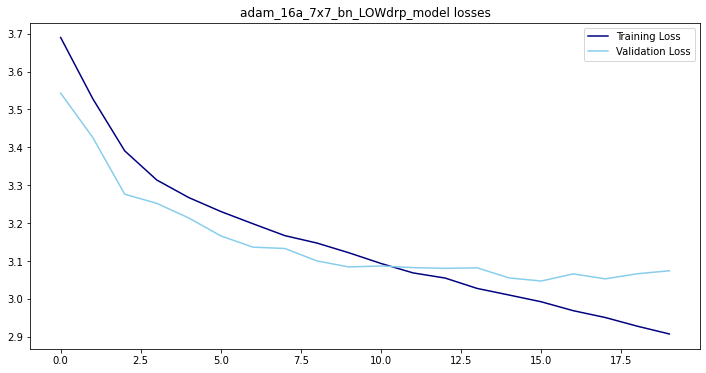

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"{my_optimizer}_{mods_summary}_model losses")
plt.plot(history16a.history['loss'], c='navy', label="Training Loss")
plt.plot(history16a.history['val_loss'], c='skyblue', label="Validation Loss")
plt.legend();

In [ ]:
#Pickle the model

with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
    pickle.dump(model16a, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......dropout_4
.........vars
......dropout_5
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......max_pooling2d_3
.........vars
......max_pooling2d_4
.........vars
......rescaling
.........vars
...metrics
......mean

In [ ]:
#alternate model save method
save_model(model16a, 'drive/MyDrive/GA files/model16a.hdf5')     # tf.keras.models.save_model

---

## Model #17a

(adam) - 9x9kernels, WITH batch normalization, LOW dropout (.1, .1, .1, .1, .1, .2), 5x filtering

In [ ]:
my_optimizer = 'adam' # 'adam' or 'rmsprop'
mods_summary = '17a_9x9_bn_LOWdrp' # a string that says what params changed (used for naming the model pickle later)
epoch_counter = 0

filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
history_logger = CSVLogger(filename, separator=",", append=True)

model17a = Sequential()
model17a.add(Rescaling(1/255, input_shape=(250,250,3)))
model17a.add(BatchNormalization())
model17a.add(Conv2D(filters=16, kernel_size=(9, 9), activation="relu"))
model17a.add(MaxPooling2D(pool_size=(2, 2)))
model17a.add(Dropout(0.1))
model17a.add(Conv2D(filters=32, kernel_size=(9, 9), activation='relu'))
model17a.add(MaxPooling2D(pool_size=(2, 2)))
model17a.add(Dropout(0.1))
model17a.add(Conv2D(filters=64, kernel_size=(9, 9), activation="relu"))
model17a.add(MaxPooling2D(pool_size=(2, 2)))
model17a.add(Dropout(0.1))
model17a.add(Conv2D(filters=128, kernel_size=(9, 9), activation='relu'))
model17a.add(MaxPooling2D(pool_size=(2, 2)))
model17a.add(Dropout(0.1))
model17a.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model17a.add(MaxPooling2D(pool_size=(2, 2)))
model17a.add(Dropout(0.1))
model17a.add(Flatten())
model17a.add(Dense(64, activation='relu'))
model17a.add(Dropout(0.2))
model17a.add(Dense(51, activation='softmax'))

print("Model Summary:")
print(model17a.summary())
print("--"*20)

model17a.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['acc']
)



Model Summary:
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_19 (Rescaling)    (None, 250, 250, 3)       0         
                                                                 
 batch_normalization_16 (Bat  (None, 250, 250, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_92 (Conv2D)          (None, 242, 242, 16)      3904      
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 121, 121, 16)     0         
 g2D)                                                            
                                                                 
 dropout_93 (Dropout)        (None, 121, 121, 16)      0         
                                                                 
 conv2d_93 (Conv2D)          (None, 11

In [ ]:
# Re-run from here down for more epochs

num_epochs = 10  # number of epochs to run on this pass

history17a = model17a.fit(
    train_gen,
    validation_data= val_gen,
    epochs=num_epochs,
    callbacks = [model_checkpoint, history_logger]
)

epoch_counter += num_epochs

print("--"*20)
print("Model Evaluation:")
print(model17a.evaluate(val_gen))

Epoch 1/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1999 - acc: 0.1405

2241/2241 [==============================] - 71s 32ms/step - loss: 3.1999 - acc: 0.1405 - val_loss: 3.1589 - val_acc: 0.1453
Epoch 2/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1794 - acc: 0.1419

2241/2241 [==============================] - 71s 32ms/step - loss: 3.1794 - acc: 0.1419 - val_loss: 3.1239 - val_acc: 0.1523
Epoch 3/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1729 - acc: 0.1430

2241/2241 [==============================] - 71s 32ms/step - loss: 3.1729 - acc: 0.1430 - val_loss: 3.1345 - val_acc: 0.1535
Epoch 4/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1575 - acc: 0.1472

2241/2241 [==============================] - 71s 32ms/step - loss: 3.1575 - acc: 0.1472 - val_loss: 3.1620 - val_acc: 0.1501
Epoch 5/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1496 - acc: 0.1497

2241/2241 [==============================] - 71s 32ms/step - loss: 3.1496 - acc: 0.1497 - val_loss: 3.1133 - val_acc: 0.1557
Epoch 6/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1375 - acc: 0.1530

2241/2241 [==============================] - 71s 32ms/step - loss: 3.1375 - acc: 0.1530 - val_loss: 3.1058 - val_acc: 0.1584
Epoch 7/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1276 - acc: 0.1527

2241/2241 [==============================] - 71s 31ms/step - loss: 3.1276 - acc: 0.1527 - val_loss: 3.1084 - val_acc: 0.1598
Epoch 8/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1154 - acc: 0.1566

2241/2241 [==============================] - 71s 32ms/step - loss: 3.1154 - acc: 0.1566 - val_loss: 3.1243 - val_acc: 0.1567
Epoch 9/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1068 - acc: 0.1584

2241/2241 [==============================] - 71s 32ms/step - loss: 3.1068 - acc: 0.1584 - val_loss: 3.0858 - val_acc: 0.1633
Epoch 10/10
2241/2241 [==============================] - ETA: 0s - loss: 3.0910 - acc: 0.1628

2241/2241 [==============================] - 71s 32ms/step - loss: 3.0910 - acc: 0.1628 - val_loss: 3.0995 - val_acc: 0.1599
----------------------------------------
Model Evaluation:
561/561 [==============================] - 9s 16ms/step - loss: 3.0995 - acc: 0.1599
[3.0994651317596436, 0.1599263697862625]


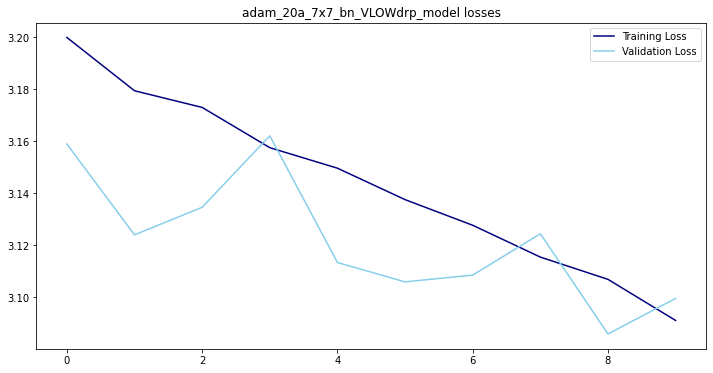

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"{my_optimizer}_{mods_summary}_model losses")
plt.plot(history17a.history['loss'], c='navy', label="Training Loss")
plt.plot(history17a.history['val_loss'], c='skyblue', label="Validation Loss")
plt.legend();

In [ ]:
#Pickle the model

with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
    pickle.dump(model17a, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......dropout_4
.........vars
......dropout_5
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......max_pooling2d_3
.........vars
......max_pooling2d_4
.........vars
......rescaling
.........vars
...metrics
......mean

In [ ]:
#alternate model save method
save_model(model17a, 'drive/MyDrive/GA files/model17a.hdf5')     # tf.keras.models.save_model

---

## Model #18a

(adam) - 7x7kernels, WITH batch normalization, original dropout (.25, .25, .25, .25, .25, .50), 5x filtering

In [ ]:
my_optimizer = 'adam' # 'adam' or 'rmsprop'
mods_summary = '18a_7x7_bn_REGdrp' # a string that says what params changed (used for naming the model pickle later)
epoch_counter = 0

filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
history_logger = CSVLogger(filename, separator=",", append=True)

model18a = Sequential()
model18a.add(Rescaling(1/255, input_shape=(250,250,3)))
model18a.add(BatchNormalization())
model18a.add(Conv2D(filters=16, kernel_size=(7, 7), activation="relu"))
model18a.add(MaxPooling2D(pool_size=(2, 2)))
model18a.add(Dropout(0.25))
model18a.add(Conv2D(filters=32, kernel_size=(7, 7), activation='relu'))
model18a.add(MaxPooling2D(pool_size=(2, 2)))
model18a.add(Dropout(0.25))
model18a.add(Conv2D(filters=64, kernel_size=(7, 7), activation="relu"))
model18a.add(MaxPooling2D(pool_size=(2, 2)))
model18a.add(Dropout(0.25))
model18a.add(Conv2D(filters=128, kernel_size=(7, 7), activation='relu'))
model18a.add(MaxPooling2D(pool_size=(2, 2)))
model18a.add(Dropout(0.25))
model18a.add(Conv2D(filters=256, kernel_size=(7, 7), activation='relu'))
model18a.add(MaxPooling2D(pool_size=(2, 2)))
model18a.add(Dropout(0.25))
model18a.add(Flatten())
model18a.add(Dense(64, activation='relu'))
model18a.add(Dropout(0.5))
model18a.add(Dense(51, activation='softmax'))

print("Model Summary:")
print(model18a.summary())
print("--"*20)

model18a.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['acc']
)



Model Summary:
Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_41 (Rescaling)    (None, 250, 250, 3)       0         
                                                                 
 batch_normalization_38 (Bat  (None, 250, 250, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_221 (Conv2D)         (None, 244, 244, 16)      2368      
                                                                 
 max_pooling2d_191 (MaxPooli  (None, 122, 122, 16)     0         
 ng2D)                                                           
                                                                 
 dropout_202 (Dropout)       (None, 122, 122, 16)      0         
                                                                 
 conv2d_222 (Conv2D)         (None, 11

In [ ]:
# Re-run from here down for more epochs

num_epochs = 10  # number of epochs to run on this pass

history18a = model18a.fit(
    train_gen,
    validation_data= val_gen,
    epochs=num_epochs,
    callbacks = [model_checkpoint, history_logger]
)

epoch_counter += num_epochs

print("--"*20)
print("Model Evaluation:")
print(model18a.evaluate(val_gen))

Epoch 1/10
2241/2241 [==============================] - ETA: 0s - loss: 3.7237 - acc: 0.0480

2241/2241 [==============================] - 73s 31ms/step - loss: 3.7237 - acc: 0.0480 - val_loss: 3.5870 - val_acc: 0.0687
Epoch 2/10
2241/2241 [==============================] - ETA: 0s - loss: 3.6011 - acc: 0.0658

2241/2241 [==============================] - 71s 31ms/step - loss: 3.6011 - acc: 0.0658 - val_loss: 3.5694 - val_acc: 0.0688
Epoch 3/10
2241/2241 [==============================] - ETA: 0s - loss: 3.5440 - acc: 0.0745

2241/2241 [==============================] - 70s 31ms/step - loss: 3.5440 - acc: 0.0745 - val_loss: 3.5110 - val_acc: 0.0789
Epoch 4/10
2241/2241 [==============================] - ETA: 0s - loss: 3.4823 - acc: 0.0861

2241/2241 [==============================] - 70s 31ms/step - loss: 3.4823 - acc: 0.0861 - val_loss: 3.3907 - val_acc: 0.0979
Epoch 5/10
2241/2241 [==============================] - ETA: 0s - loss: 3.4118 - acc: 0.0972

2241/2241 [==============================] - 71s 31ms/step - loss: 3.4118 - acc: 0.0972 - val_loss: 3.4285 - val_acc: 0.0928
Epoch 6/10
2241/2241 [==============================] - ETA: 0s - loss: 3.3809 - acc: 0.1018

2241/2241 [==============================] - 70s 31ms/step - loss: 3.3809 - acc: 0.1018 - val_loss: 3.4309 - val_acc: 0.0934
Epoch 7/10
2241/2241 [==============================] - ETA: 0s - loss: 3.3684 - acc: 0.1041

2241/2241 [==============================] - 70s 31ms/step - loss: 3.3684 - acc: 0.1041 - val_loss: 3.4799 - val_acc: 0.0828
Epoch 8/10
2241/2241 [==============================] - ETA: 0s - loss: 3.3500 - acc: 0.1077

2241/2241 [==============================] - 70s 31ms/step - loss: 3.3500 - acc: 0.1077 - val_loss: 3.4058 - val_acc: 0.0910
Epoch 9/10
2241/2241 [==============================] - ETA: 0s - loss: 3.3381 - acc: 0.1075

2241/2241 [==============================] - 71s 31ms/step - loss: 3.3381 - acc: 0.1075 - val_loss: 3.3266 - val_acc: 0.1082
Epoch 10/10
2241/2241 [==============================] - ETA: 0s - loss: 3.3440 - acc: 0.1083

2241/2241 [==============================] - 70s 31ms/step - loss: 3.3440 - acc: 0.1083 - val_loss: 3.4112 - val_acc: 0.0954
----------------------------------------
Model Evaluation:
561/561 [==============================] - 9s 15ms/step - loss: 3.4112 - acc: 0.0954
[3.4111862182617188, 0.09538684785366058]


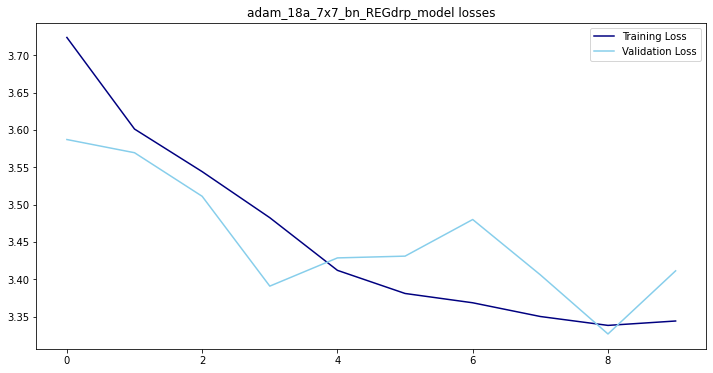

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"{my_optimizer}_{mods_summary}_model losses")
plt.plot(history18a.history['loss'], c='navy', label="Training Loss")
plt.plot(history18a.history['val_loss'], c='skyblue', label="Validation Loss")
plt.legend();

In [ ]:
#Pickle the model

with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
    pickle.dump(model18a, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......dropout_4
.........vars
......dropout_5
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......max_pooling2d_3
.........vars
......max_pooling2d_4
.........vars
......rescaling
.........vars
...metrics
......mean

In [ ]:
#alternate model save method
save_model(model18a, 'drive/MyDrive/GA files/model18a.hdf5')     # tf.keras.models.save_model

---

## Model #19rms

(rmsprop) - 7x7kernels, WITH batch normalization, LOW dropout (.1, .1, .1, .1, .1, .2), 5x filtering

In [ ]:
my_optimizer = 'rmsprop' # 'adam' or 'rmsprop'
mods_summary = '19rms_7x7_bn_LOWdrp' # a string that says what params changed (used for naming the model pickle later)
epoch_counter = 0

filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
history_logger = CSVLogger(filename, separator=",", append=True)

model19rms = Sequential()
model19rms.add(Rescaling(1/255, input_shape=(250,250,3)))
model19rms.add(BatchNormalization())
model19rms.add(Conv2D(filters=16, kernel_size=(7, 7), activation="relu"))
model19rms.add(MaxPooling2D(pool_size=(2, 2)))
model19rms.add(Dropout(0.1))
model19rms.add(Conv2D(filters=32, kernel_size=(7, 7), activation='relu'))
model19rms.add(MaxPooling2D(pool_size=(2, 2)))
model19rms.add(Dropout(0.1))
model19rms.add(Conv2D(filters=64, kernel_size=(7, 7), activation="relu"))
model19rms.add(MaxPooling2D(pool_size=(2, 2)))
model19rms.add(Dropout(0.1))
model19rms.add(Conv2D(filters=128, kernel_size=(7, 7), activation='relu'))
model19rms.add(MaxPooling2D(pool_size=(2, 2)))
model19rms.add(Dropout(0.1))
model19rms.add(Conv2D(filters=256, kernel_size=(7, 7), activation='relu'))
model19rms.add(MaxPooling2D(pool_size=(2, 2)))
model19rms.add(Dropout(0.1))
model19rms.add(Flatten())
model19rms.add(Dense(64, activation='relu'))
model19rms.add(Dropout(0.2))
model19rms.add(Dense(51, activation='softmax'))

print("Model Summary:")
print(model19rms.summary())
print("--"*20)

model19rms.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['acc']
)



Model Summary:
Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_42 (Rescaling)    (None, 250, 250, 3)       0         
                                                                 
 batch_normalization_39 (Bat  (None, 250, 250, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_226 (Conv2D)         (None, 244, 244, 16)      2368      
                                                                 
 max_pooling2d_196 (MaxPooli  (None, 122, 122, 16)     0         
 ng2D)                                                           
                                                                 
 dropout_208 (Dropout)       (None, 122, 122, 16)      0         
                                                                 
 conv2d_227 (Conv2D)         (None, 11

In [ ]:
# Re-run from here down for more epochs

num_epochs = 10  # number of epochs to run on this pass

history19rms = model19rms.fit(
    train_gen,
    validation_data= val_gen,
    epochs=num_epochs,
    callbacks = [model_checkpoint, history_logger]
)

epoch_counter += num_epochs

print("--"*20)
print("Model Evaluation:")
print(model19rms.evaluate(val_gen))

Epoch 1/10
2241/2241 [==============================] - ETA: 0s - loss: 3.5780 - acc: 0.0781

2241/2241 [==============================] - 72s 31ms/step - loss: 3.5780 - acc: 0.0781 - val_loss: 3.2887 - val_acc: 0.1282
Epoch 2/10
2241/2241 [==============================] - ETA: 0s - loss: 3.3116 - acc: 0.1268

2241/2241 [==============================] - 70s 31ms/step - loss: 3.3116 - acc: 0.1268 - val_loss: 3.1882 - val_acc: 0.1519
Epoch 3/10
2241/2241 [==============================] - ETA: 0s - loss: 3.2425 - acc: 0.1428

2241/2241 [==============================] - 70s 31ms/step - loss: 3.2425 - acc: 0.1428 - val_loss: 3.1239 - val_acc: 0.1596
Epoch 4/10
2241/2241 [==============================] - ETA: 0s - loss: 3.2016 - acc: 0.1525

2241/2241 [==============================] - 70s 31ms/step - loss: 3.2016 - acc: 0.1525 - val_loss: 3.0927 - val_acc: 0.1700
Epoch 5/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1834 - acc: 0.1561

2241/2241 [==============================] - 69s 31ms/step - loss: 3.1834 - acc: 0.1561 - val_loss: 3.1568 - val_acc: 0.1565
Epoch 6/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1697 - acc: 0.1593

2241/2241 [==============================] - 70s 31ms/step - loss: 3.1697 - acc: 0.1593 - val_loss: 3.1099 - val_acc: 0.1636
Epoch 7/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1482 - acc: 0.1629

2241/2241 [==============================] - 70s 31ms/step - loss: 3.1482 - acc: 0.1629 - val_loss: 3.3180 - val_acc: 0.1678
Epoch 8/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1496 - acc: 0.1638

2241/2241 [==============================] - 70s 31ms/step - loss: 3.1496 - acc: 0.1638 - val_loss: 3.2147 - val_acc: 0.1433
Epoch 9/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1597 - acc: 0.1615

2241/2241 [==============================] - 69s 31ms/step - loss: 3.1597 - acc: 0.1615 - val_loss: 3.3693 - val_acc: 0.1311
Epoch 10/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1629 - acc: 0.1606

2241/2241 [==============================] - 69s 31ms/step - loss: 3.1629 - acc: 0.1606 - val_loss: 3.2167 - val_acc: 0.1441
----------------------------------------
Model Evaluation:
561/561 [==============================] - 9s 16ms/step - loss: 3.2167 - acc: 0.1441
[3.21671462059021, 0.14408434927463531]


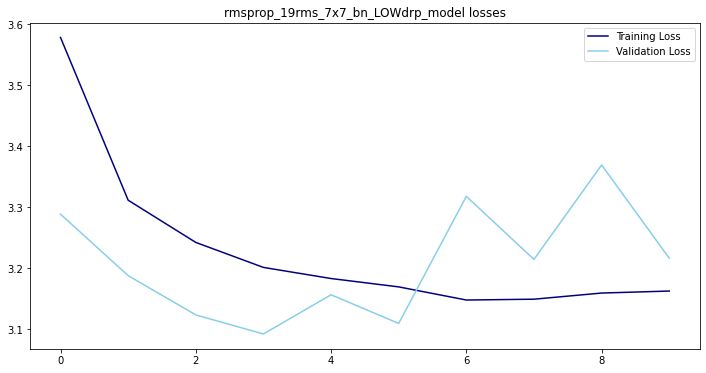

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"{my_optimizer}_{mods_summary}_model losses")
plt.plot(history19rms.history['loss'], c='navy', label="Training Loss")
plt.plot(history19rms.history['val_loss'], c='skyblue', label="Validation Loss")
plt.legend();

In [ ]:
#Pickle the model

with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
    pickle.dump(model19rms, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......dropout_4
.........vars
......dropout_5
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......max_pooling2d_3
.........vars
......max_pooling2d_4
.........vars
......rescaling
.........vars
...metrics
......mean

In [ ]:
#alternate model save method
save_model(model19rms, 'drive/MyDrive/GA files/model19rms.hdf5')     # tf.keras.models.save_model

---

## Model #20a

(adam) - 7x7kernels, WITH batch normalization, VERY low dropout (.05, .05, .05, .05, .05, .1), 5x filtering

In [ ]:
my_optimizer = 'adam' # 'adam' or 'rmsprop'
mods_summary = '20a_7x7_bn_VLOWdrp' # a string that says what params changed (used for naming the model pickle later)
epoch_counter = 0

filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
history_logger = CSVLogger(filename, separator=",", append=True)

model20a = Sequential()
model20a.add(Rescaling(1/255, input_shape=(250,250,3)))
model20a.add(BatchNormalization())
model20a.add(Conv2D(filters=16, kernel_size=(7, 7), activation="relu"))
model20a.add(MaxPooling2D(pool_size=(2, 2)))
model20a.add(Dropout(0.05))
model20a.add(Conv2D(filters=32, kernel_size=(7, 7), activation='relu'))
model20a.add(MaxPooling2D(pool_size=(2, 2)))
model20a.add(Dropout(0.05))
model20a.add(Conv2D(filters=64, kernel_size=(7, 7), activation="relu"))
model20a.add(MaxPooling2D(pool_size=(2, 2)))
model20a.add(Dropout(0.05))
model20a.add(Conv2D(filters=128, kernel_size=(7, 7), activation='relu'))
model20a.add(MaxPooling2D(pool_size=(2, 2)))
model20a.add(Dropout(0.05))
model20a.add(Conv2D(filters=256, kernel_size=(7, 7), activation='relu'))
model20a.add(MaxPooling2D(pool_size=(2, 2)))
model20a.add(Dropout(0.05))
model20a.add(Flatten())
model20a.add(Dense(64, activation='relu'))
model20a.add(Dropout(0.1))
model20a.add(Dense(51, activation='softmax'))

print("Model Summary:")
print(model20a.summary())
print("--"*20)

model20a.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['acc']
)



Model Summary:
Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_43 (Rescaling)    (None, 250, 250, 3)       0         
                                                                 
 batch_normalization_40 (Bat  (None, 250, 250, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_231 (Conv2D)         (None, 244, 244, 16)      2368      
                                                                 
 max_pooling2d_201 (MaxPooli  (None, 122, 122, 16)     0         
 ng2D)                                                           
                                                                 
 dropout_214 (Dropout)       (None, 122, 122, 16)      0         
                                                                 
 conv2d_232 (Conv2D)         (None, 11

In [ ]:
# Re-run from here down for more epochs

num_epochs = 10  # number of epochs to run on this pass

history20a = model16a.fit(
    train_gen,
    validation_data= val_gen,
    epochs=num_epochs,
    callbacks = [model_checkpoint, history_logger]
)

epoch_counter += num_epochs

print("--"*20)
print("Model Evaluation:")
print(model20a.evaluate(val_gen))

Epoch 1/10
2241/2241 [==============================] - ETA: 0s - loss: 2.9421 - acc: 0.1933

2241/2241 [==============================] - 70s 31ms/step - loss: 2.9421 - acc: 0.1933 - val_loss: 3.0201 - val_acc: 0.1816
Epoch 2/10
2240/2241 [============================>.] - ETA: 0s - loss: 2.9070 - acc: 0.2003

2241/2241 [==============================] - 70s 31ms/step - loss: 2.9069 - acc: 0.2003 - val_loss: 3.0552 - val_acc: 0.1763
Epoch 3/10
2241/2241 [==============================] - ETA: 0s - loss: 2.8743 - acc: 0.2054

2241/2241 [==============================] - 70s 31ms/step - loss: 2.8743 - acc: 0.2054 - val_loss: 3.0357 - val_acc: 0.1835
Epoch 4/10
2240/2241 [============================>.] - ETA: 0s - loss: 2.8458 - acc: 0.2137

2241/2241 [==============================] - 70s 31ms/step - loss: 2.8457 - acc: 0.2137 - val_loss: 3.0314 - val_acc: 0.1855
Epoch 5/10
2240/2241 [============================>.] - ETA: 0s - loss: 2.8176 - acc: 0.2173

2241/2241 [==============================] - 70s 31ms/step - loss: 2.8177 - acc: 0.2173 - val_loss: 3.0539 - val_acc: 0.1818
Epoch 6/10
2240/2241 [============================>.] - ETA: 0s - loss: 2.7792 - acc: 0.2279

2241/2241 [==============================] - 69s 31ms/step - loss: 2.7792 - acc: 0.2279 - val_loss: 3.0479 - val_acc: 0.1848
Epoch 7/10
2241/2241 [==============================] - ETA: 0s - loss: 2.7441 - acc: 0.2346

2241/2241 [==============================] - 70s 31ms/step - loss: 2.7441 - acc: 0.2346 - val_loss: 3.0825 - val_acc: 0.1811
Epoch 8/10
2240/2241 [============================>.] - ETA: 0s - loss: 2.7192 - acc: 0.2400

2241/2241 [==============================] - 70s 31ms/step - loss: 2.7193 - acc: 0.2400 - val_loss: 3.0860 - val_acc: 0.1812
Epoch 9/10
2240/2241 [============================>.] - ETA: 0s - loss: 2.6857 - acc: 0.2468

2241/2241 [==============================] - 70s 31ms/step - loss: 2.6856 - acc: 0.2468 - val_loss: 3.1373 - val_acc: 0.1731
Epoch 10/10
2241/2241 [==============================] - ETA: 0s - loss: 2.6489 - acc: 0.2560

2241/2241 [==============================] - 70s 31ms/step - loss: 2.6489 - acc: 0.2560 - val_loss: 3.1359 - val_acc: 0.1797
----------------------------------------
Model Evaluation:
561/561 [==============================] - 9s 15ms/step - loss: 3.9333 - acc: 0.0337
[3.9332728385925293, 0.03374797850847244]


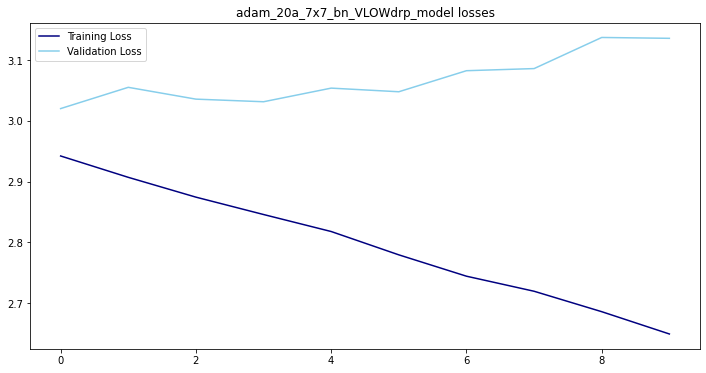

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"{my_optimizer}_{mods_summary}_model losses")
plt.plot(history20a.history['loss'], c='navy', label="Training Loss")
plt.plot(history20a.history['val_loss'], c='skyblue', label="Validation Loss")
plt.legend();

In [ ]:
#Pickle the model

with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
    pickle.dump(model20a, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......dropout_4
.........vars
......dropout_5
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......max_pooling2d_3
.........vars
......max_pooling2d_4
.........vars
......rescaling
.........vars
...metrics
......mean

In [ ]:
#alternate model save method
save_model(model20a, 'drive/MyDrive/GA files/model20a.hdf5')     # tf.keras.models.save_model

---

## Model #21a

(adam) - extra dense, 7x7kernels, WITH batch normalization, LOW dropout (.1, .1, .1, .1, .1, .2, .2), 5x filtering

In [ ]:
my_optimizer = 'adam' # 'adam' or 'rmsprop'
mods_summary = '21a_DENSE_7x7_bn_LOWdrp' # a string that says what params changed (used for naming the model pickle later)
epoch_counter = 0

filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
history_logger = CSVLogger(filename, separator=",", append=True)

model21a = Sequential()
model21a.add(Rescaling(1/255, input_shape=(250,250,3)))
model21a.add(BatchNormalization())
model21a.add(Conv2D(filters=16, kernel_size=(7, 7), activation="relu"))
model21a.add(MaxPooling2D(pool_size=(2, 2)))
model21a.add(Dropout(0.1))
model21a.add(Conv2D(filters=32, kernel_size=(7, 7), activation='relu'))
model21a.add(MaxPooling2D(pool_size=(2, 2)))
model21a.add(Dropout(0.1))
model21a.add(Conv2D(filters=64, kernel_size=(7, 7), activation="relu"))
model21a.add(MaxPooling2D(pool_size=(2, 2)))
model21a.add(Dropout(0.1))
model21a.add(Conv2D(filters=128, kernel_size=(7, 7), activation='relu'))
model21a.add(MaxPooling2D(pool_size=(2, 2)))
model21a.add(Dropout(0.1))
model21a.add(Conv2D(filters=256, kernel_size=(7, 7), activation='relu'))
model21a.add(MaxPooling2D(pool_size=(2, 2)))
model21a.add(Dropout(0.1))
model21a.add(Flatten())
model21a.add(Dense(128, activation='relu'))
model21a.add(Dropout(0.2))
model21a.add(Dense(64, activation='relu'))
model21a.add(Dropout(0.2))
model21a.add(Dense(51, activation='softmax'))

print("Model Summary:")
print(model21a.summary())
print("--"*20)

model21a.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['acc']
)



Model Summary:
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_49 (Rescaling)    (None, 250, 250, 3)       0         
                                                                 
 batch_normalization_45 (Bat  (None, 250, 250, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_261 (Conv2D)         (None, 244, 244, 16)      2368      
                                                                 
 max_pooling2d_231 (MaxPooli  (None, 122, 122, 16)     0         
 ng2D)                                                           
                                                                 
 dropout_253 (Dropout)       (None, 122, 122, 16)      0         
                                                                 
 conv2d_262 (Conv2D)         (None, 11

In [ ]:
# Re-run from here down for more epochs

num_epochs = 10  # number of epochs to run on this pass

history21a = model21a.fit(
    train_gen,
    validation_data= val_gen,
    epochs=num_epochs,
    callbacks = [model_checkpoint, history_logger]
)

epoch_counter += num_epochs

print("--"*20)
print("Model Evaluation:")
print(model21a.evaluate(val_gen))

Epoch 1/10
2241/2241 [==============================] - ETA: 0s - loss: 3.6656 - acc: 0.0538

2241/2241 [==============================] - 75s 32ms/step - loss: 3.6656 - acc: 0.0538 - val_loss: 3.4886 - val_acc: 0.0860
Epoch 2/10
2241/2241 [==============================] - ETA: 0s - loss: 3.4485 - acc: 0.0913

2241/2241 [==============================] - 70s 31ms/step - loss: 3.4485 - acc: 0.0913 - val_loss: 3.2966 - val_acc: 0.1184
Epoch 3/10
2241/2241 [==============================] - ETA: 0s - loss: 3.3384 - acc: 0.1101

2241/2241 [==============================] - 70s 31ms/step - loss: 3.3384 - acc: 0.1101 - val_loss: 3.2583 - val_acc: 0.1251
Epoch 4/10
2241/2241 [==============================] - ETA: 0s - loss: 3.2783 - acc: 0.1196

2241/2241 [==============================] - 69s 31ms/step - loss: 3.2783 - acc: 0.1196 - val_loss: 3.1959 - val_acc: 0.1355
Epoch 5/10
2241/2241 [==============================] - ETA: 0s - loss: 3.2330 - acc: 0.1308

2241/2241 [==============================] - 69s 31ms/step - loss: 3.2330 - acc: 0.1308 - val_loss: 3.1716 - val_acc: 0.1408
Epoch 6/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.1975 - acc: 0.1408

2241/2241 [==============================] - 70s 31ms/step - loss: 3.1975 - acc: 0.1408 - val_loss: 3.1229 - val_acc: 0.1510
Epoch 7/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1668 - acc: 0.1478

2241/2241 [==============================] - 70s 31ms/step - loss: 3.1668 - acc: 0.1478 - val_loss: 3.1073 - val_acc: 0.1555
Epoch 8/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1429 - acc: 0.1538

2241/2241 [==============================] - 70s 31ms/step - loss: 3.1429 - acc: 0.1538 - val_loss: 3.1554 - val_acc: 0.1549
Epoch 9/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1195 - acc: 0.1568

2241/2241 [==============================] - 70s 31ms/step - loss: 3.1195 - acc: 0.1568 - val_loss: 3.0478 - val_acc: 0.1663
Epoch 10/10
2241/2241 [==============================] - ETA: 0s - loss: 3.1058 - acc: 0.1613

2241/2241 [==============================] - 70s 31ms/step - loss: 3.1058 - acc: 0.1613 - val_loss: 3.0566 - val_acc: 0.1699
----------------------------------------
Model Evaluation:
561/561 [==============================] - 8s 14ms/step - loss: 3.0566 - acc: 0.1699
[3.0565857887268066, 0.16991131007671356]


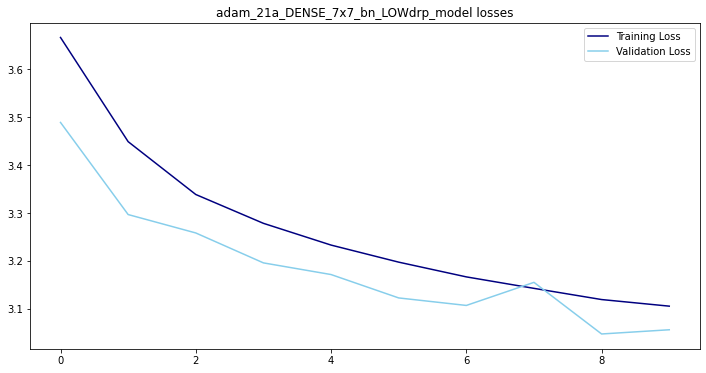

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"{my_optimizer}_{mods_summary}_model losses")
plt.plot(history21a.history['loss'], c='navy', label="Training Loss")
plt.plot(history21a.history['val_loss'], c='skyblue', label="Validation Loss")
plt.legend();

In [ ]:
#Pickle the model

with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
    pickle.dump(model21a, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......dropout_4
.........vars
......dropout_5
.........vars
......dropout_6
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......max_pooling2d_3
.........vars
.

In [ ]:
#alternate model save method
save_model(model21a, 'drive/MyDrive/GA files/model21a.hdf5')     # tf.keras.models.save_model

---

## Model #22a

(adam) - extra dense, 7x7kernels, WITH batch normalization, original dropout (.25, .25, .25, .25, .25, .50, .50), 5x filtering

In [ ]:
my_optimizer = 'adam' # 'adam' or 'rmsprop'
mods_summary = '22a_DENSE_7x7_bn_REGdrp' # a string that says what params changed (used for naming the model pickle later)
epoch_counter = 0

filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
history_logger = CSVLogger(filename, separator=",", append=True)

model22a = Sequential()
model22a.add(Rescaling(1/255, input_shape=(250,250,3)))
model22a.add(BatchNormalization())
model22a.add(Conv2D(filters=16, kernel_size=(7, 7), activation="relu"))
model22a.add(MaxPooling2D(pool_size=(2, 2)))
model22a.add(Dropout(0.25))
model22a.add(Conv2D(filters=32, kernel_size=(7, 7), activation='relu'))
model22a.add(MaxPooling2D(pool_size=(2, 2)))
model22a.add(Dropout(0.25))
model22a.add(Conv2D(filters=64, kernel_size=(7, 7), activation="relu"))
model22a.add(MaxPooling2D(pool_size=(2, 2)))
model22a.add(Dropout(0.25))
model22a.add(Conv2D(filters=128, kernel_size=(7, 7), activation='relu'))
model22a.add(MaxPooling2D(pool_size=(2, 2)))
model22a.add(Dropout(0.25))
model22a.add(Conv2D(filters=256, kernel_size=(7, 7), activation='relu'))
model22a.add(MaxPooling2D(pool_size=(2, 2)))
model22a.add(Dropout(0.25))
model22a.add(Flatten())
model22a.add(Dense(128, activation='relu'))
model22a.add(Dropout(0.5))
model22a.add(Dense(64, activation='relu'))
model22a.add(Dropout(0.5))
model22a.add(Dense(51, activation='softmax'))

print("Model Summary:")
print(model21a.summary())
print("--"*20)

model22a.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['acc']
)



Model Summary:
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_49 (Rescaling)    (None, 250, 250, 3)       0         
                                                                 
 batch_normalization_45 (Bat  (None, 250, 250, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_261 (Conv2D)         (None, 244, 244, 16)      2368      
                                                                 
 max_pooling2d_231 (MaxPooli  (None, 122, 122, 16)     0         
 ng2D)                                                           
                                                                 
 dropout_253 (Dropout)       (None, 122, 122, 16)      0         
                                                                 
 conv2d_262 (Conv2D)         (None, 11

In [ ]:
# Re-run from here down for more epochs

num_epochs = 10  # number of epochs to run on this pass

history22a = model22a.fit(
    train_gen,
    validation_data= val_gen,
    epochs=num_epochs,
    callbacks = [model_checkpoint, history_logger]
)

epoch_counter += num_epochs

print("--"*20)
print("Model Evaluation:")
print(model22a.evaluate(val_gen))

Epoch 1/10
2241/2241 [==============================] - ETA: 0s - loss: 3.7032 - acc: 0.0491

2241/2241 [==============================] - 72s 31ms/step - loss: 3.7032 - acc: 0.0491 - val_loss: 3.5617 - val_acc: 0.0729
Epoch 2/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.5326 - acc: 0.0765

2241/2241 [==============================] - 69s 31ms/step - loss: 3.5326 - acc: 0.0765 - val_loss: 3.4541 - val_acc: 0.0943
Epoch 3/10
2241/2241 [==============================] - ETA: 0s - loss: 3.4541 - acc: 0.0920

2241/2241 [==============================] - 69s 31ms/step - loss: 3.4541 - acc: 0.0920 - val_loss: 3.3764 - val_acc: 0.1062
Epoch 4/10
2241/2241 [==============================] - ETA: 0s - loss: 3.4152 - acc: 0.0973

2241/2241 [==============================] - 69s 31ms/step - loss: 3.4152 - acc: 0.0973 - val_loss: 3.3741 - val_acc: 0.1054
Epoch 5/10
2241/2241 [==============================] - ETA: 0s - loss: 3.3905 - acc: 0.1012

2241/2241 [==============================] - 69s 31ms/step - loss: 3.3905 - acc: 0.1012 - val_loss: 3.3856 - val_acc: 0.1043
Epoch 6/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.3771 - acc: 0.1045

2241/2241 [==============================] - 69s 31ms/step - loss: 3.3771 - acc: 0.1045 - val_loss: 3.3679 - val_acc: 0.1092
Epoch 7/10
2241/2241 [==============================] - ETA: 0s - loss: 3.3684 - acc: 0.1054

2241/2241 [==============================] - 69s 31ms/step - loss: 3.3684 - acc: 0.1054 - val_loss: 3.3422 - val_acc: 0.1094
Epoch 8/10
2239/2241 [============================>.] - ETA: 0s - loss: 3.3669 - acc: 0.1059

2241/2241 [==============================] - 69s 31ms/step - loss: 3.3668 - acc: 0.1059 - val_loss: 3.3525 - val_acc: 0.1069
Epoch 9/10
2241/2241 [==============================] - ETA: 0s - loss: 3.3512 - acc: 0.1092

2241/2241 [==============================] - 69s 31ms/step - loss: 3.3512 - acc: 0.1092 - val_loss: 3.2885 - val_acc: 0.1170
Epoch 10/10
2241/2241 [==============================] - ETA: 0s - loss: 3.3502 - acc: 0.1100

2241/2241 [==============================] - 69s 31ms/step - loss: 3.3502 - acc: 0.1100 - val_loss: 3.3411 - val_acc: 0.1073
----------------------------------------
Model Evaluation:
561/561 [==============================] - 8s 13ms/step - loss: 3.3411 - acc: 0.1073
[3.341104507446289, 0.10726836323738098]


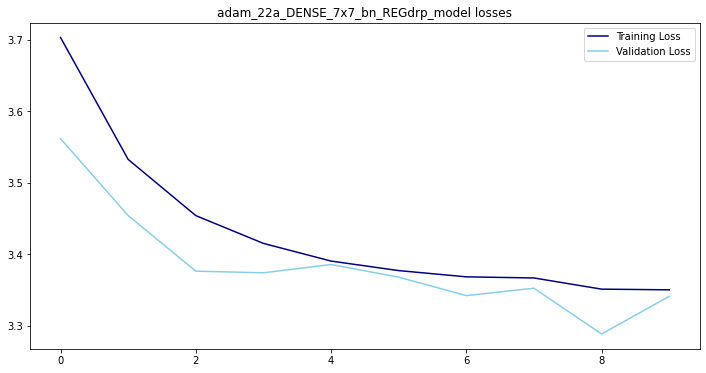

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"{my_optimizer}_{mods_summary}_model losses")
plt.plot(history22a.history['loss'], c='navy', label="Training Loss")
plt.plot(history22a.history['val_loss'], c='skyblue', label="Validation Loss")
plt.legend();

In [ ]:
#Pickle the model

with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
    pickle.dump(model22a, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......dropout_4
.........vars
......dropout_5
.........vars
......dropout_6
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......max_pooling2d_3
.........vars
.

In [ ]:
#alternate model save method
save_model(model22a, 'drive/MyDrive/GA files/model22a.hdf5')     # tf.keras.models.save_model

---

## Model #23a

(adam) - 2extra dense, 7x7kernels, WITH batch normalization, LOW dropout (.1, .1, .1, .1, .1, .2, .2, .2), 5x filtering

In [ ]:
my_optimizer = 'adam' # 'adam' or 'rmsprop'
mods_summary = '23a_2DENSE_7x7_bn_LOWdrp' # a string that says what params changed (used for naming the model pickle later)
epoch_counter = 0

filename = f'{my_optimizer}_{mods_summary}_model_log.csv'
history_logger = CSVLogger(filename, separator=",", append=True)

model23a = Sequential()
model23a.add(Rescaling(1/255, input_shape=(250,250,3)))
model23a.add(BatchNormalization())
model23a.add(Conv2D(filters=16, kernel_size=(7, 7), activation="relu"))
model23a.add(MaxPooling2D(pool_size=(2, 2)))
model23a.add(Dropout(0.1))
model23a.add(Conv2D(filters=32, kernel_size=(7, 7), activation='relu'))
model23a.add(MaxPooling2D(pool_size=(2, 2)))
model23a.add(Dropout(0.1))
model23a.add(Conv2D(filters=64, kernel_size=(7, 7), activation="relu"))
model23a.add(MaxPooling2D(pool_size=(2, 2)))
model23a.add(Dropout(0.1))
model23a.add(Conv2D(filters=128, kernel_size=(7, 7), activation='relu'))
model23a.add(MaxPooling2D(pool_size=(2, 2)))
model23a.add(Dropout(0.1))
model23a.add(Conv2D(filters=256, kernel_size=(7, 7), activation='relu'))
model23a.add(MaxPooling2D(pool_size=(2, 2)))
model23a.add(Dropout(0.1))
model23a.add(Flatten())
model23a.add(Dense(128, activation='relu'))
model23a.add(Dropout(0.2))
model23a.add(Dense(64, activation='relu'))
model23a.add(Dropout(0.2))
model23a.add(Dense(32, activation='relu'))
model23a.add(Dropout(0.2))
model23a.add(Dense(51, activation='softmax'))

print("Model Summary:")
print(model23a.summary())
print("--"*20)

model23a.compile(
    loss='categorical_crossentropy',
    optimizer=my_optimizer,
    metrics=['acc']
)



Model Summary:
Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_53 (Rescaling)    (None, 250, 250, 3)       0         
                                                                 
 batch_normalization_49 (Bat  (None, 250, 250, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_281 (Conv2D)         (None, 244, 244, 16)      2368      
                                                                 
 max_pooling2d_251 (MaxPooli  (None, 122, 122, 16)     0         
 ng2D)                                                           
                                                                 
 dropout_281 (Dropout)       (None, 122, 122, 16)      0         
                                                                 
 conv2d_282 (Conv2D)         (None, 11

In [ ]:
# Re-run from here down for more epochs

num_epochs = 10  # number of epochs to run on this pass

history23a = model23a.fit(
    train_gen,
    validation_data= val_gen,
    epochs=num_epochs,
    callbacks = [model_checkpoint, history_logger]
)

epoch_counter += num_epochs

print("--"*20)
print("Model Evaluation:")
print(model23a.evaluate(val_gen))

Epoch 1/10
2241/2241 [==============================] - ETA: 0s - loss: 3.6987 - acc: 0.0514

2241/2241 [==============================] - 73s 31ms/step - loss: 3.6987 - acc: 0.0514 - val_loss: 3.5224 - val_acc: 0.0852
Epoch 2/10
2241/2241 [==============================] - ETA: 0s - loss: 3.4942 - acc: 0.0851

2241/2241 [==============================] - 70s 31ms/step - loss: 3.4942 - acc: 0.0851 - val_loss: 3.3970 - val_acc: 0.1018
Epoch 3/10
2241/2241 [==============================] - ETA: 0s - loss: 3.4159 - acc: 0.0975

2241/2241 [==============================] - 70s 31ms/step - loss: 3.4159 - acc: 0.0975 - val_loss: 3.3584 - val_acc: 0.1098
Epoch 4/10
2241/2241 [==============================] - ETA: 0s - loss: 3.3588 - acc: 0.1059

2241/2241 [==============================] - 70s 31ms/step - loss: 3.3588 - acc: 0.1059 - val_loss: 3.3173 - val_acc: 0.1078
Epoch 5/10
2241/2241 [==============================] - ETA: 0s - loss: 3.3169 - acc: 0.1137

2241/2241 [==============================] - 70s 31ms/step - loss: 3.3169 - acc: 0.1137 - val_loss: 3.2580 - val_acc: 0.1221
Epoch 6/10
2241/2241 [==============================] - ETA: 0s - loss: 3.2939 - acc: 0.1156

2241/2241 [==============================] - 70s 31ms/step - loss: 3.2939 - acc: 0.1156 - val_loss: 3.2919 - val_acc: 0.1179
Epoch 7/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.2889 - acc: 0.1176

2241/2241 [==============================] - 70s 31ms/step - loss: 3.2889 - acc: 0.1176 - val_loss: 3.2632 - val_acc: 0.1206
Epoch 8/10
2241/2241 [==============================] - ETA: 0s - loss: 3.2627 - acc: 0.1220

2241/2241 [==============================] - 70s 31ms/step - loss: 3.2627 - acc: 0.1220 - val_loss: 3.2270 - val_acc: 0.1288
Epoch 9/10
2241/2241 [==============================] - ETA: 0s - loss: 3.2458 - acc: 0.1256

2241/2241 [==============================] - 70s 31ms/step - loss: 3.2458 - acc: 0.1256 - val_loss: 3.2016 - val_acc: 0.1320
Epoch 10/10
2240/2241 [============================>.] - ETA: 0s - loss: 3.2465 - acc: 0.1264

2241/2241 [==============================] - 70s 31ms/step - loss: 3.2465 - acc: 0.1264 - val_loss: 3.1976 - val_acc: 0.1289
----------------------------------------
Model Evaluation:
561/561 [==============================] - 8s 14ms/step - loss: 3.1976 - acc: 0.1289
[3.1975514888763428, 0.12891170382499695]


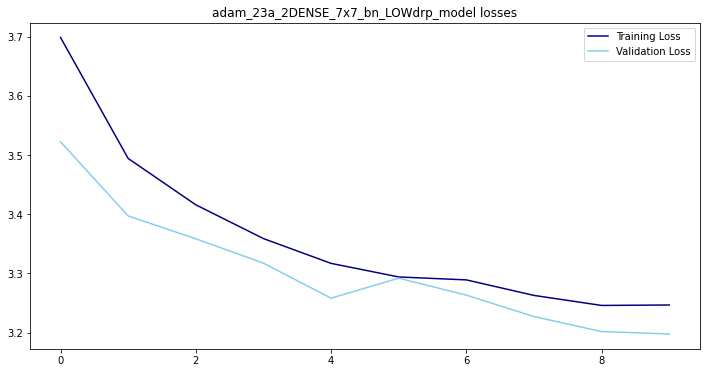

In [ ]:
plt.figure(figsize=(12,6))
plt.title(f"{my_optimizer}_{mods_summary}_model losses")
plt.plot(history23a.history['loss'], c='navy', label="Training Loss")
plt.plot(history23a.history['val_loss'], c='skyblue', label="Validation Loss")
plt.legend();

In [ ]:
#Pickle the model

with open(f'drive/MyDrive/GA files/{my_optimizer}_{mods_summary}_model_{epoch_counter}epoch.pkl', 'wb') as f:
    pickle.dump(model23a, f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......dropout_4
.........vars
......dropout_5
.........vars
......dropout_6
.........vars
......dropout_7
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.

In [ ]:
#alternate model save method
save_model(model23a, 'drive/MyDrive/GA files/model23a.hdf5')     # tf.keras.models.save_model

---

# Combined History Plot

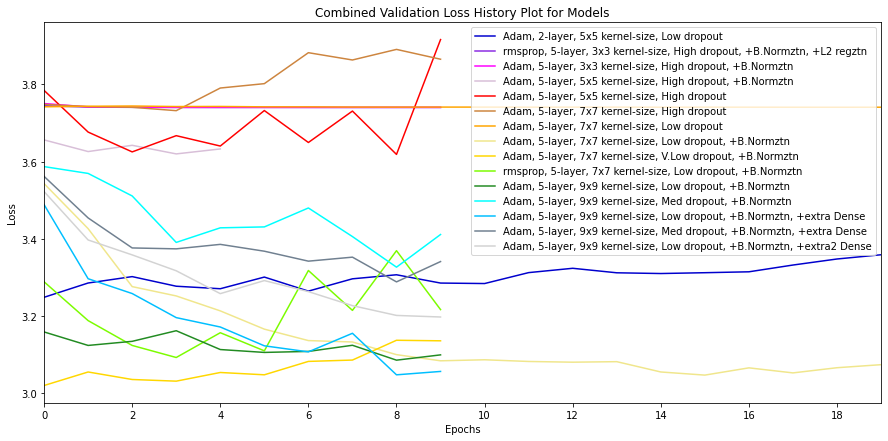

In [ ]:
plt.figure(figsize=(15,7))
plt.title(f"Combined Validation Loss History Plot for Models")
plt.plot(history12a.history['val_loss'], c='mediumblue', label="Adam, 2-layer, 5x5 kernel-size, Low dropout")     #Model #12a
plt.plot(history9rms.history['val_loss'], c='blueviolet', label="rmsprop, 5-layer, 3x3 kernel-size, High dropout, +B.Normztn, +L2 regztn")   #Model #9rms
plt.plot(history10a.history['val_loss'], c='magenta', label="Adam, 5-layer, 3x3 kernel-size, High dropout, +B.Normztn")     #Model #10a
plt.plot(history11a.history['val_loss'], c='thistle', label="Adam, 5-layer, 5x5 kernel-size, High dropout, +B.Normztn")     #Model #11a
plt.plot(history13a.history['val_loss'], c='red', label="Adam, 5-layer, 5x5 kernel-size, High dropout")     #Model #13a
plt.plot(history14a.history['val_loss'], c='peru', label="Adam, 5-layer, 7x7 kernel-size, High dropout")     #Model #14a
plt.plot(history15a.history['val_loss'], c='orange', label="Adam, 5-layer, 7x7 kernel-size, Low dropout")     #Model #15a
plt.plot(history16a.history['val_loss'], c='khaki', label="Adam, 5-layer, 7x7 kernel-size, Low dropout, +B.Normztn")     #Model #16a
plt.plot(history20a.history['val_loss'], c='gold', label="Adam, 5-layer, 7x7 kernel-size, V.Low dropout, +B.Normztn")     #Model #20a
plt.plot(history19rms.history['val_loss'], c='lawngreen', label="rmsprop, 5-layer, 7x7 kernel-size, Low dropout, +B.Normztn") #Model #19rms
plt.plot(history17a.history['val_loss'], c='forestgreen', label="Adam, 5-layer, 9x9 kernel-size, Low dropout, +B.Normztn")     #Model #17a
plt.plot(history18a.history['val_loss'], c='aqua', label="Adam, 5-layer, 9x9 kernel-size, Med dropout, +B.Normztn")     #Model #18a
plt.plot(history21a.history['val_loss'], c='deepskyblue', label="Adam, 5-layer, 9x9 kernel-size, Low dropout, +B.Normztn, +extra Dense")     #Model #21a
plt.plot(history22a.history['val_loss'], c='slategray', label="Adam, 5-layer, 9x9 kernel-size, Med dropout, +B.Normztn, +extra Dense")     #Model #22a
plt.plot(history23a.history['val_loss'], c='lightgray', label="Adam, 5-layer, 9x9 kernel-size, Low dropout, +B.Normztn, +extra2 Dense")     #Model #23a
plt.xticks(np.arange(0, 20, step=2))
plt.margins(x=0)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

---

# Make Predictions from pickled model

In [ ]:
#Read in pickle

pickle_filepath = "drive/MyDrive/GA files/adam_16a_7x7_bn_LOWdrp_model_20epoch.pkl"

with open(pickle_filepath, 'rb') as f:

    model = pickle.load(f)

Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-03-24 01:35:58           64
variables.h5                                   2023-03-24 01:35:58     26519456
config.json                                    2023-03-24 01:35:58         7009
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........var

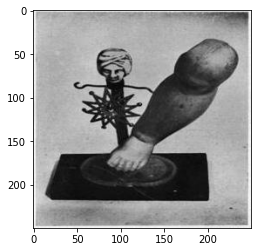

In [ ]:
# #Reference: https://stackoverflow.com/questions/56226621/how-to-extract-data-labels-back-from-tensorflow-dataset

for images, labels in val_gen.take(1):
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

numpy_images.shape
# x_data.flatten().reshape(1000, 12288)
x_data_flatten_df = pd.DataFrame(numpy_images.flatten().reshape(32,-1))
x_data_flatten_df.shape

numpy_images[0,:,:,:].shape
# numpy_images[1,:,:,:].min()
plt.imshow(numpy_images[4]/255)


In [ ]:
# y_base = model.predict(numpy_images[2:3,:,:,:])  #test prediction on a single image
y_base = model.predict(numpy_images)  # prediction on batch of 32

y_classes = y_base.argmax(axis=-1)   #return only the predicted label #
y_classes

1/1 [==============================] - 2s 2s/step


array([25, 25, 33, 41, 36, 42, 41, 36, 39, 33, 13, 50, 41, 39, 20, 41, 48,
       45, 26, 13, 19, 46, 25, 25, 13, 45, 33,  1, 39, 41, 39,  1])

In [ ]:
y_base_df = pd.DataFrame(y_base)
y_base_df.head(35)
# y_base_df.describe()
# y_base_df.iloc[:,35:45]

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,5.087367e-02,7.926159e-02,0.001079,8.539286e-03,5.105587e-02,0.004402,0.000027,9.120877e-02,7.714920e-02,7.173718e-02,...,0.000067,0.000265,6.476077e-04,4.793965e-04,0.025899,0.014941,5.321666e-03,3.170244e-07,2.556365e-03,3.283218e-04
1,6.114259e-03,2.956168e-02,0.000127,7.063738e-05,2.503098e-02,0.000211,0.000019,2.724784e-01,3.784186e-02,3.864077e-02,...,0.000036,0.000181,2.918018e-06,3.681756e-05,0.002579,0.004681,9.153541e-04,1.690732e-08,1.288609e-04,3.912239e-06
2,6.438291e-04,9.365890e-04,0.040090,4.030386e-03,1.087975e-03,0.013757,0.076739,1.543051e-08,1.096649e-03,5.639051e-07,...,0.031686,0.018611,1.108206e-02,3.928180e-03,0.019901,0.015538,6.305504e-05,2.477272e-04,2.163976e-02,4.036868e-04
3,1.334012e-03,3.981515e-03,0.045313,2.362303e-03,3.722239e-03,0.016150,0.082308,1.619682e-06,8.750691e-04,9.737345e-06,...,0.086795,0.051926,9.364104e-03,5.670712e-03,0.016871,0.057539,4.581931e-04,4.107629e-03,2.399531e-02,4.561452e-04
4,4.649781e-02,3.507915e-02,0.000916,6.003941e-02,1.815610e-02,0.066870,0.000357,5.702540e-05,6.251693e-02,5.804137e-03,...,0.000395,0.005516,2.192191e-02,2.685470e-03,0.098183,0.002983,1.944496e-03,1.905433e-07,2.436280e-03,4.173060e-03
5,8.204287e-11,1.650473e-09,0.019311,9.291766e-07,3.938180e-11,0.000010,0.008728,4.408552e-29,1.540608e-07,8.066158e-19,...,0.108245,0.445929,2.279499e-06,3.926538e-06,0.000006,0.000018,1.982824e-17,3.315267e-03,2.588837e-07,8.142093e-13
6,1.292813e-11,1.318427e-08,0.106603,1.127493e-04,1.776545e-08,0.000542,0.033590,2.325104e-23,5.236593e-09,3.838025e-17,...,0.674189,0.064908,3.715690e-08,1.182933e-07,0.000010,0.001810,6.809424e-16,9.922262e-03,8.586387e-07,5.749722e-10
7,3.818626e-02,7.128482e-02,0.001494,1.766692e-02,3.688267e-02,0.023579,0.000178,1.556657e-02,1.805101e-02,1.461893e-02,...,0.000295,0.000353,7.556635e-03,6.714567e-03,0.051384,0.014647,2.108543e-02,2.920610e-06,8.499471e-03,3.149422e-02
8,7.673383e-03,1.912938e-02,0.026317,4.952678e-03,1.609243e-02,0.030341,0.057670,1.166844e-04,8.377133e-03,1.593022e-04,...,0.028769,0.035759,2.323468e-02,1.063422e-02,0.037822,0.061232,4.614719e-03,1.772116e-03,1.173059e-02,1.981742e-03
9,2.979677e-03,6.417155e-03,0.055280,8.178118e-03,6.970934e-03,0.024548,0.065671,2.429474e-05,2.250940e-03,4.429807e-05,...,0.038773,0.026308,1.350445e-02,5.854617e-03,0.023071,0.040292,1.194630e-03,4.687433e-03,2.358316e-02,3.527110e-03
